<a href="https://colab.research.google.com/github/karelmoravek/Test-git/blob/main/Copy_of_Bee_IT_Lekce6_moravek_hotovo_OOP_21_10_2025_%C3%9At_Pavel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bee-IT Lekce 5 - OOP
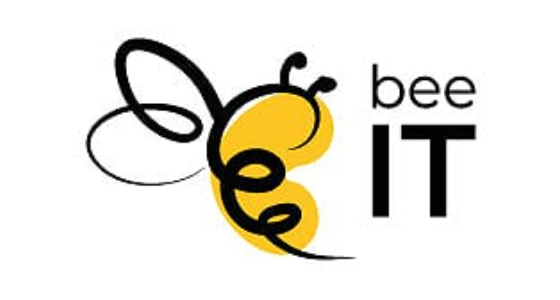



---
**Materiály k samostudiu**


* Třídy: https://www.w3schools.com/python/python_classes.asp
* Magické metody: https://www.tutorialsteacher.com/python/magic-methods-in-python
* Gettery a settery: https://www.geeksforgeeks.org/getter-and-setter-in-python/
* Dědičnost: https://www.w3schools.com/python/python_inheritance.asp
* Abstraktní třída: https://www.geeksforgeeks.org/abstract-classes-in-python/
* Návrhové vzory (není součástí našeho kurzu): https://refactoring.guru/design-patterns


##1) Problémy imperativního programování

In [ ]:
def stekej(pes):
    print(f"Pes {pes['jmeno']} steka haf haf!")

azor = {
    "jmeno": "Azor",
    "majitele": "Pepa"
}

pepa = {
    "jmeno": "Pepa",
    "pes": azor
}

stekej(pes=pepa)

Pes Pepa steka haf haf!


##2) Objektově orientované programováni (OOP)
Paradigmat (způsob uvažování) programování, jak vyřešit problém provázanosti dat a jejich chování.

###Konstrukce třídy - naplnění objektu daty

In [ ]:
class Pes:
    def __init__(self, zadane_jmeno: str, zadany_majitel: str = "Nema majitele"):
        self.jmeno = zadane_jmeno # atributy
        self.vek = 1
        self.majitel = zadany_majitel

rex = Pes(zadane_jmeno="Rexik", zadany_majitel="Pepa")
azor = Pes(zadane_jmeno="Azor")

print(rex.jmeno)
print(rex.vek)
print(rex.majitel)

Rexik
1
Pepa


###Metody - vytvoření chování objektu

In [ ]:
class Pes:
    def __init__(self, zadane_jmeno: str, zadany_majitel: str = "Nema majitele"):
        self.jmeno = zadane_jmeno # atributy
        self.vek = 1
        self.majitel = zadany_majitel

    def stekej(self):
        if self.vek < 3: # metody
            print(f"Ja stene {self.jmeno} stekam hafinky hafinky")
        else:
            print(f"Ja pes {self.jmeno} stekam haf haf")

    def curej(self, naco: str):
        print(f"Curam na {naco}")

rex = Pes(zadane_jmeno="Rexik", zadany_majitel="Pepa")
azor = Pes(zadane_jmeno="Azor")

rex.stekej()
azor.curej(naco="patnik")

Ja stene Rexik stekam hafinky hafinky
Curam na patnik


In [ ]:
class Pes:
    def stekej(self):
        print(f"Ja pes stekam haf haf")

    def curej(self, naco: str):
        print(f"Curam na {naco}")

rex = Pes()
rex.stekej()

Ja pes stekam haf haf


####Je instancí? zjištění, zda je objekt instancí třídy

###Magické metody - přepsání defaultního chování objektu

In [ ]:
from random import choice

# objekty (je jich vic) jsou zhmotnenim (instantizaci) tridy
# objekty maji atributy a metody (ty maji pristup k atributum objektu)
# magicke metody jsou metody s podtrzitkem, ktere slove nahrazuji operace jako +, -, [], (), print(...)
# trida muze mit tridni atributy a tridni metody (ty maji pristup k tridnim atributum)
# trida muze mit staticke metody, ktere nemaji pristup k atributum objektu ani tridy

class Pes:

    @staticmethod
    def jak_dela_pes(hlasitost):
        if hlasitost < 5:
            print("haf hafiky")
        else:
            print("vrrr grrr brrr gaf gaf woof")

    pocet_psu: int = 0 # tridni atribut

    @classmethod # staticka metoda
    def vypis_pocet_existujicich_psu(cls):
        print(f"Na svete existuje aktualne {cls.pocet_psu} psu.")

    def __init__(self, zadane_jmeno: str, zadany_majitel: str = "Nema majitele"):
        self.jmeno = zadane_jmeno # atributy
        self.vek = 1
        self.majitel = zadany_majitel
        Pes.pocet_psu += 1

    def stekej(self):
        if self.vek < 3: # metody
            print(f"Ja stene {self.jmeno} stekam hafinky hafinky")
        else:
            print(f"Ja pes {self.jmeno} stekam haf haf")

    def curej(self, naco: str):
        print(f"Curam na {naco}")

    def __repr__(self):
        return f"{self.jmeno=}\n{self.vek=}\n{self.majitel=}"

    def __int__(self):
        return self.vek

    def __add__(self, other):
        return Pes(
            zadane_jmeno=self.jmeno + other.jmeno,
            zadany_majitel=choice([self.majitel, other.majitel])
        )


rex = Pes(zadane_jmeno="Rexik", zadany_majitel="Pepa")
lina = Pes(zadane_jmeno="Lina", zadany_majitel="Alena")
stene_rex_a_liny = rex + lina
print(stene_rex_a_liny)

Pes.jak_dela_pes(hlasitost=5) # staticka metoda, nepotrebuje zadne informace zevnitr

Pes.vypis_pocet_existujicich_psu() # tridni metoda, ma pristup k tridnim promennym (vnitrni)

self.jmeno='RexikLina'
self.vek=1
self.majitel='Alena'
vrrr grrr brrr gaf gaf woof
Na svete existuje aktualne 3 psu.


####Vlastnosti - ovládání výpisu a nastavení dat objektu

In [ ]:
from random import choice


class Pes:

    def __init__(self, zadane_jmeno: str, zadany_majitel: str = "Nema majitele"):
        self._jmeno = zadane_jmeno # atributy
        self._vek = 1
        self.majitel = zadany_majitel

    def stekej(self):
        if self.vek < 3: # metody
            print(f"Ja stene {self.jmeno} stekam hafinky hafinky")
        else:
            print(f"Ja pes {self.jmeno} stekam haf haf")

    def curej(self, naco: str):
        print(f"Curam na {naco}")

    @property #getter/accessor
    def vek(self):
        return self._vek
    @vek.setter
    def vek(self, value):
        if value > self._vek:
            self._vek = value

    @property
    def jmeno(self):
        return f"haf haf {self._jmeno} haf haf"
    @jmeno.setter
    def jmeno(self, value):
        if not (len(value) < 4 or value[0].lower() == "a"):
            self._jmeno = value

rex = Pes(zadane_jmeno="Rexik", zadany_majitel="Pepa")
rex.jmeno = "Alenka"
print(rex.jmeno)
rex.jmeno = "Rudolf"
print(rex.jmeno)

print(rex.vek)
rex.vek = -1
print(rex.vek)
rex.vek = 5
print(rex.vek)
rex.vek = 4
print(rex.vek)

haf haf Rexik haf haf
haf haf Rudolf haf haf
1
1
5
5


####Dedicnost - rozšíření chování

In [ ]:
class Zamestnanec:
    def __init__(self, jmeno: str, mzda: int):
        self.jmeno = jmeno
        self.mzda = mzda

    def spi_pri_praci(self):
        print("zZzZzzZzzZ")


class Programator(Zamestnanec):
    def __init__(self, jmeno: str, mzda: int, programovaci_jazyk: str):
        super().__init__(jmeno, mzda)
        self.programovaci_jazyk = programovaci_jazyk

    def programuj(self, co):
        print(f"Tak ja prave programuju {co}")

    def spi_pri_praci(self): # pretezovani (override)
        print("ja nespim")


class Uklizec(Zamestnanec):
    def uklizej(self, kde):
        print(f"Tak ja jdu uklidit {kde}")


pepa = Programator(jmeno="Pepa", mzda=60_000, programovaci_jazyk="Python") # Přidán chybějící argument
pepa.programuj("IS pro firmu")
pepa.spi_pri_praci()

Tak ja prave programuju IS pro firmu
ja nespim


####Vícenásobná dědičnost

In [ ]:
class Zamestnanec:
    def __init__(self, jmeno: str, mzda: int):
        self.jmeno = jmeno
        self.mzda = mzda

    def spi_pri_praci(self):
        print("zZzZzzZzzZ")


class Programator(Zamestnanec):
    def __init__(self, jmeno: str, mzda: int, programovaci_jazyk: str):
        super().__init__(jmeno, mzda)
        self.programovaci_jazyk = programovaci_jazyk

    def programuj(self, co):
        print(f"Tak ja prave programuju {co}")

    def spi_pri_praci(self): # pretezovani (override)
        print("ja nespim")


class Uklizec(Zamestnanec):
    def uklizej(self, kde):
        print(f"Tak ja jdu uklidit {kde}")

class UklizeciProgramator(Programator, Zamestnanec):
    pass


pepa = Programator(jmeno="Pepa", mzda=60_000)
pepa.programuj("IS pro firmu")
pepa.spi_pri_praci()

TypeError: Programator.__init__() missing 1 required positional argument: 'programovaci_jazyk'

In [ ]:
# Příklad spuštění hry (ujistěte se, že třídy Karta, BalicekKaret, Hrac a Hra byly spuštěny předtím)
hra = Hra(jmena_hracu=["Hrac 1", "Hrac 2"]) # Můžete přidat více jmen hráčů
hra.hraj()

####Polymorfismus

In [ ]:
# dynamicky polymorfismus

def vykresli_obdelnik(souradnice_levehohorniho_rohu, sirka, vyska)

def vykresli_obdelnik(souradnice_levehohorniho_rohu, souradnice_pravehodolniho_rohu)

vykresli_obdelnik((2, 3), 5, 8)
vykresli_obdelnik((2, 3), (7, 11))

# v pythonu to nejde

In [ ]:
# staticky polymorfismus
from abc import ABC, abstractmethod # Abstract Base Class

class Zamestnanec(ABC): # abstraktni trida (nelze instantizovat)
    def __init__(self, jmeno: str, mzda: int):
        self.jmeno = jmeno
        self.mzda = mzda

    def spi_pri_praci(self):
        print("zZzZzzZzzZ")

    @abstractmethod # zavazek pro potomky, pokud jsi potomek, musis si implementovat abstraktni metodu
    def pracuj(self, objekt_zajmu):
        ... #nema implementaci (neni tam kod)


class Programator(Zamestnanec):
    def __init__(self, jmeno: str, mzda: int, programovaci_jazyk: str):
        super().__init__(jmeno, mzda)
        self.programovaci_jazyk = programovaci_jazyk

    def pracuj(self, objekt_zajmu):
        print(f"Tak ja prave programuju {objekt_zajmu}") # ma implementaci, ma splneny zavazek

    def spi_pri_praci(self): # pretezovani (override)
        print("ja nespim")


class Uklizec(Zamestnanec):
    def pracuj(self, objekt_zajmu):
        print(f"Tak ja jdu uklidit {kde}")


pepa = Programator(jmeno="Pepa", mzda=60_000, programovaci_jazyk="Python")
alena = Uklizec(jmeno="Alena", mzda=40_000)

In [ ]:
# Interface (rozhrani) python nema
# daji se nasimulovat jako abstraktni tridy bez promennych a jen s abstraktnimi metody

# Protokoly
# samostudium

##Úkoly

###Cvičení 5A - IMazlíček (začátečník)
Programujete novou aplikaci pro firmu Apple s názvem IMazlíček. Šéf vám zadá za úkol vytvořit třídu, do které se budou ukládat informace o domácím mazlíčkovi. Napište třídu Mazlicek, která má následující atributy:


1.   Jméno mazlíčka (řetězec)
2.   Jméno majitelů mazlíčka (seznam řetězců)
3.   Druh zvířete (řetězec)
4.   Hlad (v procentech - vymyslete, jak na to)
5.   Vyvenčen (ano/ne)

V konstruktoru třídy se nastaví pouze jméno, seznam majitelů a druh zvířete. Hlad se nastaví automaticky na 100% a vyvenčení na NE.

Třída bude umět následující metody:
1. Vyvenčení() - nastaví atribut vyvenčen na ANO
2. Krmení(množství) - snízí procenta hladu podle vloženého množství
3. Spánek() - vyresetuje hlad na 100% a vyvenčení na NE



In [ ]:
class Mazlicek:
    def __init__(self, jmeno: str, majitele: list[str], druh: str):
        self.jmeno = jmeno
        self.majitele = majitele
        self.druh = druh
        self._hlad = 100  # Použijeme chráněný atribut pro vnitřní použití
        self._vyvencen = False # Použijeme chráněný atribut pro vnitřní použití

    def vyvenceni(self):
        self._vyvencen = True

    def krmeni(self, mnozstvi: int):
        # Zajistíme, aby hlad nešel pod 0
        self._hlad = max(0, self._hlad - mnozstvi)

    def spanek(self):
        self._hlad = 100
        self._vyvencen = False

    # Volitelné: Přidáme gettery pro hlad a vyvencen, pokud jsou potřeba pro čtení zvenčí
    @property
    def hlad(self):
        return self._hlad

    @property
    def vyvencen(self):
        return self._vyvencen

# Příklad použití:
# muj_mazlicek = Mazlicek("Fido", ["Alice", "Bob"], "Pes")
# print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")
# muj_mazlicek.krmeni(50)
# muj_mazlicek.vyvenceni()
# print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")
# muj_mazlicek.spanek()
# print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")

In [ ]:
# Příklad použití:
muj_mazlicek = Mazlicek("Fido", ["Alice", "Bob"], "Pes")
print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")
muj_mazlicek.krmeni(50)
muj_mazlicek.vyvenceni()
print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")
muj_mazlicek.spanek()
print(f"{muj_mazlicek.jmeno} hlad: {muj_mazlicek.hlad}, vyvencen: {muj_mazlicek.vyvencen}")

Fido hlad: 100, vyvencen: False
Fido hlad: 50, vyvencen: True
Fido hlad: 100, vyvencen: False


###Cvičení 5B - Objektově orientovaný editor fotografií (pokročilý)
Imperativně napsaný program na úpravu fotografií převeďte do objektově orientované podoby. Vytvořte třídu Editor, která bude obsahovat jako atribut vše potřebné, co jednotlivé grafické operace potřebují (práh, velikost změny kontrastu, název fotografie nebo přímo odkaz na ní). Metody budou samotné procedury, které fotografii upravovaly.

In [ ]:
#Původní kód, který upravte do OOP

from PIL import Image

def zvys_kontrast(obrazek, rozdil):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            if prumer > 127:
                obrazek.putpixel((x,y), (r+rozdil, g+rozdil, b+rozdil))
            else:
                obrazek.putpixel((x,y), (r-rozdil, g-rozdil, b-rozdil))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab

def sniz_kontrast(obrazek, rozdil):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            if prumer > 127:
                obrazek.putpixel((x,y), (r-rozdil, g-rozdil, b-rozdil))
            else:
                obrazek.putpixel((x,y), (r+rozdil, g+rozdil, b+rozdil))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab

def zvys_jas(obrazek, rozdil):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            obrazek.putpixel((x,y), (r-rozdil, g-rozdil, b-rozdil))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab

def sniz_jas(obrazek, rozdil):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            obrazek.putpixel((x,y), (r+rozdil, g+rozdil, b+rozdil))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab

def odbarvi(obrazek):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            obrazek.putpixel((x,y), (prumer, prumer, prumer))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab

def neguj(obrazek):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            obrazek.putpixel((x,y), (255-prumer, 255-prumer, 255-prumer))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab


def binarizuj(obrazek, prahova_hodnota):
    sirka, vyska = obrazek.size
    x = 0
    while x < sirka:
        y = 0
        while y < vyska:
            r, g, b = obrazek.getpixel((x,y))
            prumer = int((r+g+b)/3)
            if prumer > prahova_hodnota:
                obrazek.putpixel((x,y), (255, 255, 255))
            else:
                obrazek.putpixel((x,y), (0, 0, 0))
            y += 1
        x += 1
    display(obrazek) #obrazek.show() pokud to budete programovat mimo colab


def main():
    obrazek = Image.open("prase.jpg") #je nutne si obrazek nahrat do colabu a prejmenovat
    moznosti = [neguj, odbarvi, binarizuj, sniz_jas, zvys_jas, sniz_kontrast, zvys_kontrast]

    volba = int(input("""Zvol, co chces delat s obrazkem pomoci cisla:\n
    [1] Negace\n
    [2] Odbarveni\n
    [3] Binarizace\n
    [4] Snizeni jasu\n
    [5] Zvyseni jasu\n
    [6] Snizeni kontrast\n
    [7] Zvyseni kontrastu\n
    """))-1
    if volba > 1:
        parametr = int(input("Zadej hodnotu parametru zvolene operace: "))
        moznosti[volba](obrazek, parametr)
    else:
        moznosti[volba](obrazek)

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'prase.jpg'

###Cvičení 5C - Fotografie jako objekt (expert)
 Vytvořte třídu Fotografie a vytvořte její dvě instance. Tyto dvě instance sečtěte a zobrazte výsledek na obrazovku. Aby program fungoval, budete se muset zamyslet nad tím, jak by mohl vypadat součet dvou fotografií. Budete muset přidat magickou metodu pro součet a implementovat její algoritmus. To samé udělejte pro rozdíl fotografií.

In [ ]:
from PIL import Image
import tempfile # Import tempfile pro vytváření dočasných souborů

class Fotografie:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru).convert("RGB") # Zajistí režim RGB

    def __add__(self, other):
        if not isinstance(other, Fotografie):
            raise TypeError("Operand musí být instance Fotografie")
        if self.obrazek.size != other.obrazek.size:
            raise ValueError("Obrázky musí mít stejné rozměry pro sčítání")

        width, height = self.obrazek.size
        novy_obrazek = Image.new('RGB', (width, height))

        for x in range(width):
            for y in range(height):
                r1, g1, b1 = self.obrazek.getpixel((x, y))
                r2, g2, b2 = other.obrazek.getpixel((x, y))

                r = min(255, r1 + r2)
                g = min(255, g1 + g2)
                b = min(255, b1 + b2)

                novy_obrazek.putpixel((x, y), (r, g, b))

        # Vytvoří fiktivní cestu pro novou instanci Fotografie
        # Ve skutečné aplikaci byste obrázek mohli uložit nebo to řešit jinak
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        novy_obrazek.save(temp_file.name)
        temp_file.close()

        return Fotografie(temp_file.name)


    def __sub__(self, other):
        if not isinstance(other, Fotografie):
            raise TypeError("Operand musí být instance Fotografie")
        if self.obrazek.size != other.obrazek.size:
            raise ValueError("Obrázky musí mít stejné rozměry pro odčítání")

        width, height = self.obrazek.size
        novy_obrazek = Image.new('RGB', (width, height))

        for x in range(width):
            for y in range(height):
                r1, g1, b1 = self.obrazek.getpixel((x, y))
                r2, g2, b2 = other.obrazek.getpixel((x, y))

                r = max(0, r1 - r2)
                g = max(0, g1 - g2)
                b = max(0, b1 - b2)

                novy_obrazek.putpixel((x, y), (r, g, b))

        # Vytvoří fiktivní cestu pro novou instanci Fotografie
        # Ve skutečné aplikaci byste obrázek mohli uložit nebo to řešit jinak
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        novy_obrazek.save(temp_file.name)
        temp_file.close()

        return Fotografie(temp_file.name)

In [ ]:
display(soucet_fotografii.obrazek)
display(rozdil_fotografii.obrazek)

NameError: name 'soucet_fotografii' is not defined

In [ ]:
soucet_fotografii = foto1 + foto2
rozdil_fotografii = foto1 - foto2

In [ ]:
foto1 = Fotografie("prase.jpg")
foto2 = Fotografie("prase.jpg")

In [ ]:
# Vytvoření instancí třídy Fotografie
foto1 = Fotografie("prase.jpg")
foto2 = Fotografie("prase.jpg")

# Sčítání a odčítání instancí
soucet_fotografii = foto1 + foto2
rozdil_fotografii = foto1 - foto2

# Nyní můžete zobrazit výsledky spuštěním buňky s display()
# display(soucet_fotografii.obrazek)
# display(rozdil_fotografii.obrazek)

###Cvičení 5D - Třída mobilní telefon (pokročilý)
Vytvořte třídu, reprezentující mobilní telefon. Třída bude mít 3 atributy - značka a stav baterie, kontakty (zamyslete se nad nejlepší datovou strukturou). Napište program tak, aby značka nešla změnit, pouze přečíst (getter). Stav baterie se bude měnit, kdykoliv se zavolá metoda zapnise(), a kontakty bude možné číst i měnit pomocí getteru a setteru.

In [ ]:
class MobilniTelefon:
    def __init__(self, značka: str):
        self._znacka = značka
        self._stav_baterie = 100  # Stav baterie v procentech, výchozí 100%
        self._kontakty = {} # Slovník pro ukládání kontaktů

    @property
    def značka(self):
        """Getter pro značku."""
        return self._znacka

    @property
    def stav_baterie(self):
        """Getter pro stav baterie."""
        return self._stav_baterie


    def zapnise(self):
        """Metoda pro simulaci zapnutí telefonu a snížení stavu baterie."""
        # Sníží stav baterie o 10, ale ne pod 0
        self._stav_baterie = max(0, self._stav_baterie - 10)

    @property
    def kontakty(self):
        """Getter pro kontakty."""
        return self._kontakty

    @kontakty.setter
    def kontakty(self, value: dict):
        """Setter pro kontakty."""
        if isinstance(value, dict):
            self._kontakty = value
        else:
            print("Kontakty musí být ve formátu slovníku.")

In [ ]:
# Vytvoření instance třídy MobilniTelefon
muj_telefon = MobilniTelefon("Apple")

# Testování getteru pro značku
print(f"Značka telefonu: {muj_telefon.značka}")
# Pokus o změnu značky (nemělo by fungovat, protože není setter)
try:
    muj_telefon.značka = "Samsung"
except AttributeError as e:
    print(f"Pokus o změnu značky selhal: {e}")


# Testování počátečního stavu baterie (přístup k chráněnému atributu pro testování)
# V reálném scénáři byste mohli přidat getter pro stav baterie, pokud by bylo potřeba jej číst zvenčí
print(f"Počáteční stav baterie: {muj_telefon._stav_baterie}")

# Testování metody zapnise() a změny stavu baterie
print("Zapínám telefon...")
muj_telefon.zapnise()
print(f"Stav baterie po 1. zapnutí: {muj_telefon._stav_baterie}")
muj_telefon.zapnise()
print(f"Stav baterie po 2. zapnutí: {muj_telefon._stav_baterie}")
# Simulace vybití baterie
for _ in range(10):
    muj_telefon.zapnise()
print(f"Stav baterie po vybití: {muj_telefon._stav_baterie}")


# Testování getteru pro kontakty
print(f"Počáteční kontakty: {muj_telefon.kontakty}")

# Testování setteru pro kontakty se slovníkem
nove_kontakty = {"Pepa": "123456789", "Alena": "987654321"}
muj_telefon.kontakty = nove_kontakty
print(f"Aktualizované kontakty: {muj_telefon.kontakty}")

# Testování setteru pro kontakty s jiným typem než slovník
print("Pokus o nastavení kontaktů na seznam...")
muj_telefon.kontakty = ["kontakt1", "kontakt2"]
print(f"Kontakty po neúspěšném nastavení: {muj_telefon.kontakty}")

###Cvičení 5E - Zbraně do hry
Napište třídu zbraň, která představuje obecnou zbraň do nějaké hry na hrdiny. Zamyslete se, jaké atributy zbraň má a jaké metody zbraň umí (ve hře). Vytvořte poté dva její potomky, které rozšíříte o jejich unikátní atributy a metody. Potomkami mohou být např. Luk a Meč, kde luk oproti meči musí mít pro zaútočení šípy v toulci. Upravte program tak, aby nešla vytvořit instance obecné zbraně. V programu bude možné vytvořit pouze její potomky.

In [ ]:
from abc import ABC, abstractmethod

# Abstraktni trida pro obecnou zbran
class Zbran(ABC):
  def __init__(self, nazev: str, sila_utoku: int): # Chybejici dvojtecka pridana
      self.nazev= nazev
      self.sila_utoku = sila_utoku

      @abstractmethod
      def utok(self): # Chybejici dvojtecka pridana
        return f"{self.nazev} (Sila utoku: {self.sila_utoku})"

# Potomek: Luk
class Luk(Zbran):
  def __init__(self, nazev: str, sila_utoku: int, pocet_sipu: int): # Chybejici dvojtecka pridana
    super().__init__(nazev, sila_utoku)
    self.pocet_sipu = pocet_sipu

  def utok(self): # Chybejici dvojtecka pridana
    """Impementace utoku pro luk - vyzaduje sipy."""
    if self.pocet_sipu > 0:
      print(f"{self.nazev} vystrelil sip! Zpusobene poskozeni: {self.sila_utoku} ")
      self.pocet_sipu -= 1
    else: # Chybejici dvojtecka pridana
      print(f"{self.nazev} nema zadne sipy!")

  def pridej_sipy(self, pocet: int): # Chybejici dvojtecka pridana
    """Metoda pro pridani sipu do toulce"""
    self.pocet_sipu += pocet
    print(f"pridano {pocet} sipu do {self.nazev}. Celkem sipu: {self.pocet_sipu}")

  def __str__(self): # Chybejici dvojtecka pridana
    return f"{super().__str__()} (Sipy: {self.pocet_sipu})"


# Potome: Mec
class Mec(Zbran):
  def __init__(self, nazev: str, sila_utoku: int, material: str): # Chybejici dvojtecka pridana
    super().__init__(nazev, sila_utoku)
    self.material = material

  def utok(self): # Chybejici dvojtecka pridana
    """Implementace utoku pro mec - nevyzaduje sipy."""
    print(f"{self.nazev} sekl! Zpusobene poskozeni: {self.sila_utoku}")

  def nabrousit(self): # Chybejici dvojtecka pridana
    """Metoda pro nabrouseni mece."""
    print(f"{self.nazev} byl nabrousen. Je ted ostrejsi!")
    #Zde by se mohla pripadne zvysit sila utoku

  def __str__(self): # Chybejici dvojtecka pridana
    return f"{super().__str__()} (Material: {self.material})"

# Prikad pouziti:
# Zkusit vytvorit instanci abstraktni tridy (melo by selhat)
# try:
#     obecna_zbran =  Zbran("Obecna zbran", 10)
# except TypeError as e:
#     print(f"Nelze vytvorit instanci abstraktni tridy Zbran: {e} )

# Vytvoreni instance potomku
muj_luk = Luk("Dlouhy luk", 15, 5)
muj_mec = Mec("Ocelovy mec", 20, "Ocel")

# Pouziti zbrani
print(muj_luk)
muj_luk.utok()
muj_luk.utok()
muj_luk.pridej_sipy(3)
muj_luk.utok() # Chybejici zavorky pridany

print("\n" + str(muj_mec)) # Pouziti __str__ explicitne pro ukazku
muj_mec.utok()
muj_mec.nabrousit()
muj_mec.utok()

<__main__.Luk object at 0x7d6cd6eb8890> (Sipy: 5)
Dlouhy luk vystrelil sip! Zpusobene poskozeni: 15 
Dlouhy luk vystrelil sip! Zpusobene poskozeni: 15 
pridano 3 sipu do Dlouhy luk. Celkem sipu: 6
Dlouhy luk vystrelil sip! Zpusobene poskozeni: 15 

<__main__.Mec object at 0x7d6cd6ebbb90> (Material: Ocel)
Ocelovy mec sekl! Zpusobene poskozeni: 20
Ocelovy mec byl nabrousen. Je ted ostrejsi!
Ocelovy mec sekl! Zpusobene poskozeni: 20


###Cvičení 5F - Smrtící diamant smrti
Jazyk Python umožňuje tzv. vícenásobnou dědičnost (třída může mít více rodičů). Některé jazyky tuto schopnost zakazují (např. C#). Díky této vlastnosti programovacího jazyka může nastat problém, kterému říkáme deadly diamond of death. Přečtěte si o tomto problému na následující stránce: https://cs.wikipedia.org/wiki/V%C3%ADcen%C3%A1sobn%C3%A1_d%C4%9Bdi%C4%8Dnost
a proveďte vědecký experiment v Pythonu, jak se zachová. Nápověda: Třída Savec se umí ozvat. Její dva potomci budou Pes a Kočka, které si přepisují ozvání se podle sebe. Potomek Psa a Kočky může být Kočkopes. Jak se zachová kočkopes, pokud zavolám metodu pro ozvání se?

In [ ]:
# Definice základní třídy
class Zvire:
    def ozvi_se(self):
        print("Obecný zvířecí zvuk")

# Definice odvozených tříd
class Pes(Zvire):
    def ozvi_se(self):
        print("Haf haf!")

class Kocka(Zvire):
    def ozvi_se(self):
        print("Mňau!")

# Definice třídy s vícenásobnou dědičností (Smrtící diamant)
class Kockopes(Pes, Kocka):
    pass

# Vytvoření instance a volání metody
kockopes = Kockopes()
kockopes.ozvi_se() # Provede se metoda ozvi_se z první rodičovské třídy v MRO (Pes)

# Prozkoumání Method Resolution Order (MRO)
print("\nMethod Resolution Order (MRO) pro Kockopes:")
print(Kockopes.__mro__)

Haf haf!

Method Resolution Order (MRO) pro Kockopes:
(<class '__main__.Kockopes'>, <class '__main__.Pes'>, <class '__main__.Kocka'>, <class '__main__.Zvire'>, <class 'object'>)


###Cvičení 5G - Dopravní informační systém (pokročilý)
Vytvořte abstraktní třídu pro dopravní prostředek. Naprogramujte ji potřebné atributy, které je nutné o všech dopravních prostředcích ukládat. Dále ji naprogramuje metody, které dopravní prostředky vykazují ve svém chování (schopnost se pohybovat, natankovat palivo atd.). Poté vytvořte alespoň 3 konkrétní potomky, ve kterých naprogramujete algoritmus jednotlivým metodám.

In [ ]:
from abc import ABC, abstractmethod

# Abstraktni trida pro dopravni prostredek
class DopravniProstredek(ABC):
  def __init__(self, nazev: str, max_rychlost: int):
    self.nazev = nazev
    self.max_rychlost = max_rychlost
    self.aktualni_rychlost = 0 # Opraven překlep zde

  @abstractmethod
  def pohybuj_se(self, cil: str):
    """Abstraktni metoda pro pohyb k cily."""
    pass

  @abstractmethod # Přidána abstraktní metoda pro tankování/doplňování energie
  def natankuj(self, mnozstvi: float):
      """Abstraktní metoda pro tankování paliva/energie."""
      pass

  def zastav(self):
    """Metoda pro zastaveni dopravniho prostredku."""
    self.aktualni_rychlost = 0
    print(f"{self.nazev} zastavil.")

  def __str__(self):
    return f"{self.nazev} (Max. rychlost: {self.max_rychlost} km/h)"


# Konkretni potomek: Auto
class Auto(DopravniProstredek):
  def __init__(self, nazev: str, max_rychlost: int, spotreba_na_100km: float):
    super().__init__(nazev, max_rychlost)
    self.spotreba_na_100km = spotreba_na_100km
    self.stav_paliva = 0

  def pohybuj_se(self, cil: str):
    print(f"Auto {self.nazev} jede smerem k {cil}.")
    self.aktualni_rychlost = self.max_rychlost # Zjednoduseni simulace pohybu
    # Zde by se mohla odecitat spotreba paliva podle ujete vzdalenosti

  def natankuj(self, mnozstvi: float):
    self.stav_paliva += mnozstvi
    print(f"Auto {self.nazev} natankovalo {mnozstvi} litru. Aktualni stav paliva: {self.stav_paliva} litru.")

  def troubi(self):
    print(f"Auto {self.nazev} troubi: Beeee!")


# Konkretni potomek: Vlak
class Vlak(DopravniProstredek):
  def __init__(self, nazev: str, max_rychlost: int, pocet_vagonu: int):
    super().__init__(nazev, max_rychlost)
    self.pocet_vagonu = pocet_vagonu
    self.stav_energie = 0 # Vlak na elektrinu/naftu, simulace energie

  def pohybuj_se(self, cil: str):
    print(f"Vlak {self.nazev} se rozjizdi smerem k {cil} s {self.pocet_vagonu} vagony")
    self.aktualni_rychlost = self.max_rychlost # Zjednodusena simulace pohybu
    # Zde by se mohla odecitat spotreba energie

  def natankuj(self, mnozstvi: float): # Implementace abstraktní metody natankuj
    self.stav_energie += mnozstvi
    print(f"Vlak {self.nazev} doplnil {mnozstvi} jednotek energie. Aktualni stav energie: {self.stav_energie} jednotek.")


  def pripoj_vagon(self, pocet: int):
    self.pocet_vagonu += pocet
    print(f"K vlaku {self.nazev} bylo pripojeno {pocet} vagonu: Celkem vagonu: {self.pocet_vagonu}.")


# Priklad pouziti:
# Nelze vytvorit instanci abstraktni tridy:
# try:
#     dp = DopravniProstredek("Obecny dopravni prostredek", 100)
# except TypeError as e:
#     print(f"Chyba: {e})

moje_auto = Auto("Octavia", 200, 6.5)
moje_auto.natankuj(50)
moje_auto.pohybuj_se("Praha")
moje_auto.troubi()
moje_auto.zastav()

muj_vlak = Vlak("Pendolino", 160, 7)
muj_vlak.natankuj(1000)
muj_vlak.pohybuj_se("Brno")
muj_vlak.pripoj_vagon(3)
muj_vlak.zastav()

Auto Octavia natankovalo 50 litru. Aktualni stav paliva: 50 litru.
Auto Octavia jede smerem k Praha.
Auto Octavia troubi: Beeee!
Octavia zastavil.
Vlak Pendolino doplnil 1000 jednotek energie. Aktualni stav energie: 1000 jednotek.
Vlak Pendolino se rozjizdi smerem k Brno s 7 vagony
K vlaku Pendolino bylo pripojeno 3 vagonu: Celkem vagonu: 10.
Pendolino zastavil.


##Výzva dne - Karetní hra Prší
Naprogramujte objektově karetní hru Prší. Zamyslete se, jaké všechny třídy by měly ve hře existovat, jaké atributy o nich budeme muset ukládat a jaké metody mohou tyto třídy dělat. Nápověda: třída může být ke všemu, na co si dokážeme ukázat (hra samotná, balíček karet, držené karty v ruce, karta samotná, barva karty). Pro procvičení tématiky dědičnosti zkuste nalézt alespoň jednu třídu, které může být rodičem jiné. Vzhledem k tomu, že se stejnými karty lze hrát více her, můžete naprogramovat alespoň jednu abstraktní třídu, kterou si program připravíte pro jiné verze karetních her.

In [ ]:
class Karta:
  def __init__(self, hodnota: str, barva: str):
    self.hodnota = hodnota
    self.barva = barva

  def __str__(self):
    """Reprezentace karty pro tisk."""
    return f"{self.hodnota} {self.barva}"

  def __repr__(self):
    """Reprezentace karty pro vyvojare."""
    return f"Karta(hodnota='{self.hodnota}', barva='{self.barva}')" # Opravena syntaxe f-stringu

# Priklad vytvoreni a vypisu karty:
# moje_karta = Karta("Eso", "Cervena")
# print(moje_karta)

In [ ]:
import random

class BalicekKaret:
    def __init__(self):
      # Definice hodnot a barev pro standartni balice (napr. Mariasove karty)
      self.hodnoty = ["Sedma", "Osma", "Devitka", "Spodek", "Svrsek", "Kral", "Eso"]
      self.barvy = ["Cervena", "Zelena", "Kulova", "Zaludova"]
      self.karty = [] # Seznam objektu Karta

      # Vytvoreni balicku karet
      self.vytvor_balicek()
      self.zamichej()

    def vytvor_balicek(self):
      """Vytvori standartni balicek 32 karet."""
      self.karty = [Karta(hodnota, barva) for barva in self.barvy for hodnota in self.hodnoty]

    def zamichej(self):
      """Zamicha balicek karet."""
      random.shuffle(self.barvy)

    def lizni_kartu(self):
      """Lizne kartu z vrchu balicku. Vrati none, pokud je balicek prazdny."""
      if len(self.karty) > 0:
        return self.karty.pop() #Odebere a vrati posledni kartu (vrch balicku)
      else:
        return None

    def __len__(self):
      """Vrati pocet karet v balicku."""
      return len(self.karty)

    def __str__(self):
        """Reprezentace balicku pro tisk."""
        return f"Balicek s {len(self)} kartami."

    def __repr__(self):
      """Reprezentace balicku pro vyvojare."""
      return f"BalicekKaret({len(self)} karet, vrchni karta: {self.karty[-1] if self.karty else 'zadna'})"

# Priklad pouziti:
# muj_balicek = BalicekKaret()
# print(muj_balicek)
# karta = muj_balicek.lizni_kartu()
# if karta
#     print(f"Liznuta karta: {karta})
# print(muj_balicek)



In [ ]:
class Hrac:
  def __init__(self, jmeno: str):
    self.jmeno = jmeno # Opraven překlep zde
    self.ruka = [] # Seznam objektu Karta, ktere ma hrac v ruce

  def pridej_kartu(self, karta):
    """Prida kartu na ruku hraci."""
    self.ruka.append(karta)

  def zahraj_kartu(self, karta_k_zahrani):
    """Zahrajte kartu z ruky hrace. Vrati kartu, pokud ji hrac ma."""
    if karta_k_zahrani in self.ruka:
      self.ruka.remove(karta_k_zahrani)
      return karta_k_zahrani
    else:
      print(f"Hrac {self.jmeno} nema kartu {karta_k_zahrani} na ruce.")
      return None

  def ma_karty(self):
    """Zkontroluje, zda ma hrac jeste nejake karty."""
    return len(self.ruka) > 0

  def __str__(self):
    """Reprezentace hrace pro tisk."""
    karty_na_ruce = ", ".join(str(karta) for karta in self.ruka) if self.ruka else "zadne karty"
    return f"Hrac {self.jmeno} (karty: {karty_na_ruce})"

  def __repr__(self):
    """Reprezentace hrace pro vyvojare."""
    return f"Hrac(jmeno='{self.jmeno}', pocet_karet={len(self.ruka)})"

# Priklad pouziti (pro implementaci tridy BaliceKaret):
# balicek = BalicekKaret()
# hrac1 = Hrac("Pepa")
# hrac1.pridej_kartu(balicek.lizni_kartu())
# hrac1.pridej_kartu(balicek.lizni_kartu())
# print(hrac1)
# zahrana_karta = hrac1.zahraj_kartu(hrac1.ruka[0])
# if zahrana_karta:
#     print(f"Zahrana karta: {zahrana_karta})
# print(hrac1)

In [ ]:
# Predpokladame, ze tridy Karta, BalicekKaret a Hrac jiz mame definovane a spustene.

class Hra:
  def __init__(self, jmena_hracu: list[str]):
    self.balicek = BalicekKaret() # Vytvori novy balicek karet
    self.odkladaci_hromadka = [] # Seznam karet na odkladaci hromadce
    self.hraci = [Hrac(jmeno) for jmeno in jmena_hracu] # Vytvori hrace podle zadanych jmen
    self.aktualni_hrac_index = 0 # Index aktualniho hrace v seznamu

  def aktualni_hrac(self):
    """Vrati objekt aktualniho hrace."""
    return self.hraci[self.aktualni_hrac_index]

  def dalsi_hrac(self):
    """Prepne na dalsiho hrace."""
    self.aktualni_hrac_index = (self.aktualni_hrac_index + 1) % len(self.hraci)

# Dalsi metody pro prubeh hry (rozdavani, herni cyklus, pravidla) budou pridany v dalsich krocich.

In [ ]:
# Pokracovani ve tride Hra (pridavame k predchozimu kroku tridy Hra)

class Hra: # Potrebujeme znovu definovat tridu nebo presunout metody do puvodni bunky
    def rozdej_karty(self, pocet_karet: int = 4):
        """Rozdejte urceny pocet karet kazdemu hraci."""
        for _ in range(pocet_karet):
            for hrac in self.hraci:
                karta = self.balicek.lizni_kartu()
                if karta:
                    hrac.pridej_kartu(karta)
                else:
                    print("Balicek je prazdny, nelze rozdat vsechny karty.")
                    return # prerusi rozdavani, pokud dojde balicek

    def poloz_prvni_kartu(self):
        """polozi prvni kartu ma odkladaci hromadku."""
        karta = self.balicek.lizni_kartu()
        if karta:
            self.odkladaci_hromadka.append(karta)
            print(f"Prvni karta na stole: {karta}")
            # Zde by se v budoucnu pridala logika pro specialni prvni kartu (napr. Sedma)
            return karta
        else:
            print("Balicek je prazdny, nelze polozit prvni kartu.")
            return None

    def inicializuj_hru(self):
        """Kompletne inicializuje novou hru."""
        self.balicek = BalicekKaret() # Zajisti novy zamichany balicek karet
        self.odkladaci_hromadka = []
        self.rozdej_karty()
        self.poloz_prvni_kartu()
        self.aktualni_hrac_index = 0 # Zacina prvni hrac

# Priklad pouziti po implementaci vyse uvedenych metod do tridy Hra:
# hra = Hra(jemna_hracu=["Pepa", "Alena"])
# hra.inicializuj_hru()
# print("\nKarty na ruce po rozdani: ")
# for hrac in hra.hraci:
#     print(hrac)
# print(f"\nOdkladaci hromadka: {hra.odkladaci_hromadk a[-1] if hra.odkladaci_hromadka else 'prazdna'})

In [ ]:
# Pokracovani ve tride Hra:

class Hra:
  def __init__(self, jmena_hracu: list[str]):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.hraci = [Hrac(jmeno) for jmeno in jmena_hracu]
    self.aktualni_hrac_index = 0
    self.inicializuj_hru() # Volani inicializace hry hned po vytvoreni objektu

  def aktualni_hrac(self):
    return self.hraci[self.aktualni_hrac_index]

  def dalsi_hrac(self):
    self.aktualni_hrac_index = (self.aktualni_hrac_index + 1) % len(self.hraci)

  def rozdej_karty(self, pocet_karet: int = 4):
    for _ in range(pocet_karet):
      for hrac in self.hraci:
        karta = self.balicek.lizni_kartu()
        if karta:
          hrac.pridej_kartu(karta)
        else:
          print("Balicek je prazdny, nelze rozdat vsechny karty.")
          return

  def poloz_prvni_kartu(self):
    karta = self.balicek.lizni_kartu()
    if karta:
      self.odkladaci_hromadka.append(karta)
      print(f"Prvni karta na stole: {karta}")
      return karta
    else:
      print("Balicek je prazdny, nelze polozit prvni kartu.")
      return None

  def inicializuj_hru(self):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.rozdej_karty()
    self.poloz_prvni_kartu()
    self.aktualni_hrac_index = 0

  def hraj(self):
    """Hlavni herni cyklus."""
    print("\nHra zacina")

    while True: # Smycka hry, dokud neskonci
        hrac = self.aktualni_hrac()
        karta_na_stole = self.odkladaci_hromadka[-1] # Vrchni karta na odkladaci hromadce

        print(f"\nNa stole je karta: {karta_na_stole}")
        print(f"Na tahu je hrac: {hrac.jmeno}")
        print(f"Karty na ruce: {hrac.ruka}")

        # Zde bude v dalsim kroku implementovana logika tahu hrace( zahrani karty, lizani)

        # Prozatim prepneme na dalsiho hrace
        print("Hrac zatim nic nedela, prechazime na dalsiho hrace...")
        self.dalsi_hrac()

        # Zde v dalsim kroku zkontrolujeme podminky hry

# Priklad spusteni hry po implementaci tridy Hra:
# hra = Hra(jmena_hracu=["Pepa", "Alena"])
# hra.hraj() # spusti herni cyklus



In [ ]:
# Pokracovani ve tride Hra:

class Hra:
  def __init__(self, jmena_hracu: list[str]):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.hraci = [Hrac(jmeno) for jmeno in jmena_hracu]
    self.aktualni_hrac_index = 0
    self.inicializuj_hru() # Volani inicializace hry hned po vytvoreni objektu

  def aktualni_hrac(self):
    return self.hraci[self.aktualni_hrac_index]

  def dalsi_hrac(self):
    self.aktualni_hrac_index = (self.aktualni_hrac_index + 1) % len(self.hraci)

  def rozdej_karty(self, pocet_karet: int = 4):
    for _ in range(pocet_karet):
      for hrac in self.hraci:
        karta = self.balicek.lizni_kartu()
        if karta:
          hrac.pridej_kartu(karta)
        else:
          print("Balicek je prazdny, nelze rozdat vsechny karty.")
          return

  def poloz_prvni_kartu(self):
    karta = self.balicek.lizni_kartu()
    if karta:
      self.odkladaci_hromadku.append(karta)
      print(f"Prvni karta na stole: {karta}")
      return karta
    else:
      print("Balicek je prazdny, nelze polozit prvni kartu.")
      return None

  def inicializuj_hru(self):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.rozdej_karty()
    self.poloz_prvni_kartu()
    self.aktualni_hrac_index = 0

  def je_platna_karta(self, karta_k_zahrani: Karta, karta_na_stole: Karta) -> bool:
    """Zkontrolujte, zda je karta platna pro zahrani podle zakladnich pravidel ( shoda barvy nebo hodnoty.)"""
    # Pravidla pro specialni karty budou pridana pozdeji
    return karta_k_zahrani.barva == karta_na_stole.barva or karta_k_zahrani.hodnota == karta_na_stole.hodnota

  def hraj(self):
    """Hlavni herni cyklus."""
    print("\nHra zacina!")

    while True: # Smycka hry, dokud neskonci
        hrac = self.aktualni_hrac()
        karta_na_stole = self.odkladaci_hromadka[-1] # Vrchni karta na odkladaci hromadce

        print("-" * 20)
        print(f"Na stole je karta: {karta_na_stole}")
        print(f"Na tahu je hrac: {hrac.jmeno}")
        print(f"Karty na ruce: {hrac.ruka}")

        # Ziskani vstupu od hrace pro vyber karty k zahrani
        while True:
            mozne_karty_k_zahrani = [karta for karta in hrac.ruka if self.je_platna_karta(karta, karta_na_stole)]

            if not mozne_karty_k_zahrani:
                print(f"Hrac {hrac.jmeno} nema zadnou platnou kartu k zahrani.")
                liznuta_karta = self.balicek.lizni_kartu()
                if liznuta_karta:
                    hrac.pridej_kartu(liznuta_karta)
                    print(f"Hrac {hrac.jmeno} lizl kartu: {liznuta_karta}")
                    # Zkontrolovat, zda liznutou kartu muze ihned zahrat
                    if self.je_platna_karta(liznuta_karta, karta_na_stole):
                        volba = input("Chces ihned zahrat liznutou kartu? (a/n): ").lower()
                        if volba == 'a':
                            zahrana_karta = hrac.zahraj_kartu(liznuta_karta)
                            self.odkladaci_hromadka.append(zahrana_karta)
                            print(f"Hrac {hrac.jmeno} zahral liznutou kartu: {zahrana_karta}")
                            # Zde se v budoucnu prida logika pro specialni karty
                            if not hrac.ma_karty():
                                print(f"\nHrac {hrac.jmeno} vyhral!")
                                return # Konec hry
                            self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani
                            break # Prerusi vnitrni smycku pro tah hrace
                        else:
                            print("Hrac se rozhodl nezahrat liznutou kartu.")
                            self.dalsi_hrac() # Prechazime na dalsiho hrace
                            break # Prerusi vnitrni smycku pro tah hrace
                    else:
                        print("Liznuta karta neni platna k zahrani.")
                        self.dalsi_hrac() # Prechazime na dalsiho hrace po lizani
                        break # Prerusi vnitrni smycku pro tah hrace
                else:
                    print("Balicek je prazdny. Hra konci remizou nebo podle jinych pravidel.")
                    # Zde by se resilo co bude dal kdyz dojde balicek
                    return # Ukonci hru, pokud dojde balicek
            else: # Hrac ma platne karty k zahrani
                try:
                    # Vypis dostupnych karet s indexy
                    print("Mozne karty k zahrani (index na ruce):")
                    for i, karta in enumerate(hrac.ruka):
                        if karta in mozne_karty_k_zahrani:
                            print(f"[{i}] {karta}")

                    volba_index = int(input(f"{hrac.jmeno}, zadej index karty, kterou chces zahrat, nebo -1.pro liznuti:"))
                    if volba_index == -1:
                         print(f"Hrac {hrac.jmeno} se rozhodl liznout kartu.")
                         liznuta_karta = self.balicek.lizni_kartu()
                         if liznuta_karta:
                             hrac.pridej_kartu(liznuta_karta)
                             print(f"Hrac {hrac.jmeno} lizl kartu: {liznuta_karta}")
                             # Zde by se pripadne zkontrolovalo, zda muze liznutou kartu zahrat
                             if self.je_platna_karta(liznuta_karta, karta_na_stole):
                                volba_zahrat_liznutou = input("Chces ihned zahrat liznutou kartu? (a/n): ").lower()
                                if volba_zahrat_liznutou == 'a':
                                     zahrana_karta = hrac.zahraj_kartu(liznuta_karta)
                                     self.odkladaci_hromadka.append(zahrana_karta)
                                     print(f"Hrac {hrac.jmeno} zahral liznutou kartu: {zahrana_karta}")
                                     if not hrac.ma_karty():
                                         print(f"\nHrac {hrac.jmeno} vyhral!")
                                         return # Konec hry
                                     self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani
                                     break # Prerusi vnitrni smycku
                                else:
                                     print("Hrac se rozhodl nezahrat liznutou kartu.")
                                     self.dalsi_hrac() # Prechazime na dalsiho hrace
                                     break # Prerusi vnitrni smycku
                             else:
                                print("Liznuta karta neni platna k zahrani.")
                                self.dalsi_hrac() # Prechazime na dalsiho hrace po lizani
                                break # Prerusi vnitrni smycku
                         else:
                             print("Balicek je prazdny. Hra konci remizou nebo podle jinych pravidel.")
                             return # Ukonci hru, pokud dojde balicek

                    elif 0 <= volba_index < len(hrac.ruka):
                        zvolena_karta = hrac.ruka[volba_index]
                        if self.je_platna_karta(zvolena_karta, karta_na_stole):
                            zahrana_karta = hrac.zahraj_kartu(zvolena_karta)
                            self.odkladaci_hromadka.append(zahrana_karta)
                            print(f"Hrac {hrac.jmeno} zahral kartu: {zahrana_karta}")
                            # Zde se v budoucnu prida logika pro specialni karty

                            # Zde v dalsim kroku zkontrolujeme podminky konce hry
                            if not hrac.ma_karty():
                                print(f"\nHrac {hrac.jmeno} vyhral!")
                                return # Konec hry

                            self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani karty
                            break # Prerusi vnitrni smycku pro tah hrace
                        else:
                            print("Tuto kartu nelze zahrat. Vyber platnou kartu nebo lizni.")
                    else:
                        print("Neplatny index karty. Zadej cislo v rozsahu, nebo -1 pro liznuti.")
                except ValueError:
                    print("Neplatny vstup. Zadej prosim cislo.")

        # Zde se v budoucnu zkontroluji komplexnejsi podminky komce hry

In [ ]:
# Pokracovani ve tride Hra:

class Hra:
  def __init__(self, jmena_hracu: list[str]):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.hraci = [Hrac(jmeno) for jmeno in jmena_hracu]
    self.aktualni_hrac_index = 0
    self.inicializuj_hru() # Volani inicializace hry hned po vytvoreni objektu

  def aktualni_hrac(self):
    return self.hraci[self.aktualni_hrac_index] # Opraveno z self.hraci_index

  def dalsi_hrac(self):
    self.aktualni_hrac_index = (self.aktualni_hrac_index + 1) % len(self.hraci)

  def rozdej_karty(self, pocet_karet: int = 4):
    for _ in range(pocet_karet):
      for hrac in self.hraci:
        karta = self.balicek.lizni_kartu()
        if karta:
          hrac.pridej_kartu(karta)
        else:
          print("Balicek je prazdny, nelze rozdat vsechny karty.")
          return

  def poloz_prvni_kartu(self):
    karta = self.balicek.lizni_kartu()
    if karta:
      self.odkladaci_hromadka.append(karta) # Opraven překlep zde
      print(f"Prvni karta na stole: {karta}")
      # Prvni karta by nemela byt specialni, v realne hre by se resilo jinak
      # Pro zjednoduseni to zde neresime
      return karta
    else:
      print("Balicek je prazdny, nelze polozit prvnui kartu.")
      return None

  def inicializuj_hru(self):
    self.balicek = BalicekKaret()
    self.odkladaci_hromadka = []
    self.rozdej_karty()
    self.poloz_prvni_kartu()
    # Zajistit, ze prvni karta na odkladaci hromadce neni Svrsek
    while self.odkladaci_hromadka[-1].hodnota == "Svrsek":
        vratka_karta = self.odkladaci_hromadka.pop()
        self.balicek.karty.insert(0, vratka_karta) # Vratit svrsek na dno balicku
        self.balicek.zamichej() # Zamichat balicek
        self.poloz_prvni_kartu() # Polozit novou prvni kartu

    self.aktualni_hrac_index = 0

  def je_platna_karta(self, karta_k_zahrani: Karta, karta_na_stole: Karta) -> bool:
    """Zkontrolujte, zda je karta platna pro zahrani podle zakladnich pravidel ( shoda barvy nebo hodnoty.)"""
    # Svrsek lze hrat kdykoliv
    if karta_k_zahrani.hodnota == "Svrsek":
        return True
    # Jinak shoda barvy nebo hodnoty
    return karta_k_zahrani.barva == karta_na_stole.barva or karta_k_zahrani.hodnota == karta_na_stole.hodnota

  def aplikuj_efekt_specialni_karty(self, zahrana_karta: Karta):
      """Aplikuje efekt zahrane specialni karty."""
      if zahrana_karta.hodnota == "Sedma":
          print("Sedma! Dalsi hrac lize 2 karty.")
          dalsi_hrac = self.hraci[(self.aktualni_hrac_index + 1) % len(self.hraci)]
          for _ in range(2):
              karta = self.balicek.lizni_kartu()
              if karta:
                  dalsi_hrac.pridej_kartu(karta)
              else:
                  print("Balicek je prazdny, nelze liznout kartu.")
                  break # Prerusit lizani, pokud dojde balicek
      elif zahrana_karta.hodnota == "Eso":
          print("Eso! Dalsi hrac stoji.")
          self.dalsi_hrac() # Preskoci tah dalsiho hrace
      elif zahrana_karta.hodnota == "Svrsek":
          print("Svrsek! Hrac si vybira barvu.")
          # Logika pro vyber barvy
          vybrana_barva = ""
          while vybrana_barva not in self.balicek.barvy: # Zajisti, ze vybrana barva je platna
              vybrana_barva = input(f"{self.aktualni_hrac().jmeno}, zvol barvu ({', '.join(self.balicek.barvy)}): ").capitalize() # Zmeneno na Capitalize() pro shodu s definici barev
              if vybrana_barva not in self.balicek.barvy:
                  print("Neplatna barva. Zvolte z dostupnych barev.")
          self.odkladaci_hromadka[-1].barva = vybrana_barva # Zmeni barvu vrchni karty na odkladaci hromadce
          print(f"Nova barva je {vybrana_barva}.")
      elif zahrana_karta.hodnota == "Spodek":
          print("Spodek! Dalsi hrac lize 4 karty.")
          dalsi_hrac = self.hraci[(self.aktualni_hrac_index + 1) % len(self.hraci)]
          for _ in range(4):
              karta = self.balicek.lizni_kartu()
              if karta:
                  dalsi_hrac.pridej_kartu(karta)
              else:
                  print("Balicek je prazdny, nelze liznout kartu.")
                  break # Prerusit lizani, pokud dojde balicek
      elif zahrana_karta.hodnota == "Osma":
          print("Osma! Dalsi hrac stoji.")
          self.dalsi_hrac() # Preskoci tah dalsiho hrace


  def hraj(self):
    """Hlavni herni cyklus."""
    print("\nHra zacina!")

    while True: # Smycka hry, dokud neskonci
        hrac = self.aktualni_hrac()
        karta_na_stole = self.odkladaci_hromadka[-1] # Vrchni karta na odkladaci hromadce

        print("-" * 20)
        print(f"Na stole je karta: {karta_na_stole}")
        print(f"Na tahu je hrac: {hrac.jmeno}")
        print(f"Karty na ruce: {hrac.ruka}")

        # Ziskani vstupu od hrace pro vyber karty k zahrani
        while True:
            mozne_karty_k_zahrani = [karta for karta in hrac.ruka if self.je_platna_karta(karta, karta_na_stole)]

            if not mozne_karty_k_zahrani and len(self.balicek.karty) == 0:
                print("\nBalicek je prazdny a hrac nema platnou kartu k zahrani.")
                print("Hra konci.")
                return # Ukonci hru, pokud dojde balicek a hrac nema karty

            if not mozne_karty_k_zahrani:
                print(f"Hrac {hrac.jmeno} nema zadnou platnou kartu k zahrani. Liza kartu...")
                liznuta_karta = self.balicek.lizni_kartu()
                if liznuta_karta:
                    hrac.pridej_kartu(liznuta_karta)
                    print(f"Hrac {hrac.jmeno} lizl kartu: {liznuta_karta}")
                    # Zkontrolovat, zda liznutou kartu muze ihned zahrat
                    if self.je_platna_karta(liznuta_karta, karta_na_stole):
                        volba = input("Chces ihned zahrat liznutou kartu? (a/n): ").lower()
                        if volba == 'a':
                            zahrana_karta = hrac.zahraj_kartu(liznuta_karta)
                            self.odkladaci_hromadka.append(zahrana_karta)
                            print(f"Hrac {hrac.jmeno} zahral liznutou kartu: {zahrana_karta}")
                            self.aplikuj_efekt_specialni_karty(zahrana_karta) # Aplikace efektu

                            if not hrac.ma_karty():
                                print(f"\n--- Hrac {hrac.jmeno} vyhral! ---")
                                return # Konec hry
                            self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani
                            break # Prerusi vnitrni smycku pro tah hrace
                        else:
                            print("Hrac se rozhodl nezahrat liznutou kartu.")
                            self.dalsi_hrac() # Prechazime na dalsiho hrace
                            break # Prerusi vnitrni smycku
                    else:
                        print("Liznuta karta neni platna k zahrani.")
                        self.dalsi_hrac() # Prechazime na dalsiho hrace po lizani
                        break # Prerusi vnitrni smycku
                else:
                    print("\nBalicek je prazdny.")
                    # Pokud dojde balicek na lizani a hrac nema platnou kartu, hra konci
                    print("Hra konci.")
                    return # Ukonci hru, pokud dojde balicek

            else: # Hrac ma platne karty k zahrani
                try:
                    # Vypis dostupnych karet s indexy
                    print("Mozne karty k zahrani (index na ruce):")
                    for i, karta in enumerate(hrac.ruka):
                         print(f"[{i}] {karta}") # Vypiseme vsechny karty s indexy

                    volba_index = int(input(f"{hrac.jmeno}, zadej index karty, kterou chces zahrat, nebo -1 pro liznuti:"))
                    if volba_index == -1:
                         print(f"Hrac {hrac.jmeno} se rozhodl liznout kartu.")
                         liznuta_karta = self.balicek.lizni_kartu()
                         if liznuta_karta:
                             hrac.pridej_kartu(liznuta_karta)
                             print(f"Hrac {hrac.jmeno} lizl kartu: {liznuta_karta}")
                             # Zde by se pripadne zkontrolovalo, zda muze liznutou kartu zahrat
                             if self.je_platna_karta(liznuta_karta, karta_na_stole):
                                volba_zahrat_liznutou = input("Chces ihned zahrat liznutou kartu? (a/n): ").lower()
                                if volba_zahrat_liznutou == 'a':
                                     zahrana_karta = hrac.zahraj_kartu(liznuta_karta)
                                     self.odkladaci_hromadka.append(zahrana_karta)
                                     print(f"Hrac {hrac.jmeno} zahral liznutou kartu: {zahrana_karta}")
                                     self.aplikuj_efekt_specialni_karty(zahrana_karta) # Aplikace efektu

                                     if not hrac.ma_karty():
                                         print(f"\n--- Hrac {hrac.jmeno} vyhral! ---")
                                         return # Konec hry
                                     self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani
                                     break # Prerusi vnitrni smycku
                                else:
                                     print("Hrac se rozhodl nezahrat liznutou kartu.")
                                     self.dalsi_hrac() # Prechazime na dalsiho hrace
                                     break # Prerusi vnitrni smycku
                             else:
                                print("Liznuta karta neni platna k zahrani.")
                                self.dalsi_hrac() # Prechazime na dalsiho hrace po lizani
                                break # Prerusi vnitrni smycku
                         else:
                             print("\nBalicek je prazdny.")
                             # Pokud dojde balicek na lizani a hrac nema platnou kartu, hra konci
                             print("Hra konci.")
                             return # Ukonci hru, pokud dojde balicek

                    elif 0 <= volba_index < len(hrac.ruka):
                        zvolena_karta = hrac.ruka[volba_index]
                        if self.je_platna_karta(zvolena_karta, karta_na_stole):
                            zahrana_karta = hrac.zahraj_kartu(zvolena_karta)
                            self.odkladaci_hromadka.append(zahrana_karta)
                            print(f"Hrac {hrac.jmeno} zahral kartu: {zahrana_karta}")
                            self.aplikuj_efekt_specialni_karty(zahrana_karta) # Aplikace efektu

                            # Zde v dalsim kroku zkontrolujeme podminky konce hry
                            if not hrac.ma_karty():
                                print(f"\n--- Hrac {hrac.jmeno} vyhral! ---")
                                return # Konec hry

                            self.dalsi_hrac() # Prechazime na dalsiho hrace po uspesnem zahrani karty
                            break # Prerusi vnitrni smycku pro tah hrace
                        else:
                            print("Tuto kartu nelze zahrat. Vyber platnou kartu nebo lizni.")
                    else:
                        print("Neplatny index karty. Zadej cislo v rozsahu, nebo -1 pro liznuti.")
                except ValueError:
                    print("Neplatny vstup. Zadej prosim cislo.")

        # Zde se v budoucnu zkontroluji komplexnejsi podminky komce hry

In [ ]:
# Kód pro spuštění hry Prší
# Ujistěte se, že buňky s definicemi tříd Karta, BalicekKaret, Hrac a Hra byly spuštěny před touto buňkou.

hra = Hra(jmena_hracu=["Hrac 1", "Hrac 2"]) # Můžete přidat více jmen hráčů, např. ["Pepa", "Alena", "Karel"]
hra.hraj() # Spustí hlavní herní cyklus

Prvni karta na stole: Kral Kulova

Hra zacina!
--------------------
Na stole je karta: Kral Kulova
Na tahu je hrac: Hrac 1
Karty na ruce: [Karta(hodnota='Eso', barva='Zaludova'), Karta(hodnota='Svrsek', barva='Zaludova'), Karta(hodnota='Devitka', barva='Zaludova'), Karta(hodnota='Sedma', barva='Zaludova')]
Mozne karty k zahrani (index na ruce):
[0] Eso Zaludova
[1] Svrsek Zaludova
[2] Devitka Zaludova
[3] Sedma Zaludova
Hrac 1, zadej index karty, kterou chces zahrat, nebo -1 pro liznuti:-1
Hrac Hrac 1 se rozhodl liznout kartu.
Hrac Hrac 1 lizl kartu: Svrsek Kulova
Chces ihned zahrat liznutou kartu? (a/n): a
Hrac Hrac 1 zahral liznutou kartu: Svrsek Kulova
Svrsek! Hrac si vybira barvu.
Hrac 1, zvol barvu (Zelena, Cervena, Kulova, Zaludova): Zaludova
Nova barva je Zaludova.
--------------------
Na stole je karta: Svrsek Zaludova
Na tahu je hrac: Hrac 2
Karty na ruce: [Karta(hodnota='Kral', barva='Zaludova'), Karta(hodnota='Spodek', barva='Zaludova'), Karta(hodnota='Osma', barva='Zaludova

In [ ]:
class Fotografie:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru)

    def __add__(self, other):
        pass

    def __sub__(self, other):
        pass

## Implementace algoritmu pro sčítání a odčítání fotografií

### Subtask:
V rámci magických metod implementujte logiku pro sčítání a odčítání obrazových dat. Bude potřeba promyslet, jak se budou pixely sčítat/odčítat (např. průměrování, sčítání hodnot kanálů s ořezáním na 0-255).


**Reasoning**:
Implement the logic for adding and subtracting image data within the `__add__` and `__sub__` methods, including dimension checks and pixel-wise operations with value capping.



In [ ]:
from PIL import Image

class Fotografie:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru).convert("RGB") # Ensure RGB mode

    def __add__(self, other):
        if not isinstance(other, Fotografie):
            raise TypeError("Operand must be a Fotografie instance")
        if self.obrazek.size != other.obrazek.size:
            raise ValueError("Images must have the same dimensions for addition")

        width, height = self.obrazek.size
        novy_obrazek = Image.new('RGB', (width, height))

        for x in range(width):
            for y in range(height):
                r1, g1, b1 = self.obrazek.getpixel((x, y))
                r2, g2, b2 = other.obrazek.getpixel((x, y))

                r = min(255, r1 + r2)
                g = min(255, g1 + g2)
                b = min(255, b1 + b2)

                novy_obrazek.putpixel((x, y), (r, g, b))

        # Create a dummy path for the new Fotografie instance
        # In a real application, you might save the image or handle this differently
        import tempfile
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        novy_obrazek.save(temp_file.name)
        temp_file.close()

        return Fotografie(temp_file.name)


    def __sub__(self, other):
        if not isinstance(other, Fotografie):
            raise TypeError("Operand must be a Fotografie instance")
        if self.obrazek.size != other.obrazek.size:
            raise ValueError("Images must have the same dimensions for subtraction")

        width, height = self.obrazek.size
        novy_obrazek = Image.new('RGB', (width, height))

        for x in range(width):
            for y in range(height):
                r1, g1, b1 = self.obrazek.getpixel((x, y))
                r2, g2, b2 = other.obrazek.getpixel((x, y))

                r = max(0, r1 - r2)
                g = max(0, g1 - g2)
                b = max(0, b1 - b2)

                novy_obrazek.putpixel((x, y), (r, g, b))

        # Create a dummy path for the new Fotografie instance
        # In a real application, you might save the image or handle this differently
        import tempfile
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        novy_obrazek.save(temp_file.name)
        temp_file.close()

        return Fotografie(temp_file.name)


## Vytvoření instancí třídy fotografie

### Subtask:
Vytvořte dvě instance třídy `Fotografie` s načtenými obrázky.


**Reasoning**:
Create two instances of the Fotografie class, loading the image file 'prase.jpg' into each one.



In [ ]:
foto1 = Fotografie("prase.jpg")
foto2 = Fotografie("prase.jpg")

## Sčítání a odčítání instancí

### Subtask:
Použijte operátory `+` a `-` pro sčítání a odčítání vytvořených instancí.


**Reasoning**:
Perform addition and subtraction on the created Fotografie instances using the overloaded operators and store the results.



In [ ]:
soucet_fotografii = foto1 + foto2
rozdil_fotografii = foto1 - foto2

**Reasoning**:
Display the resulting images from the addition and subtraction operations to verify the implementation of the magic methods.



In [ ]:
display(soucet_fotografii.obrazek)
display(rozdil_fotografii.obrazek)

## Summary:

### Data Analysis Key Findings

*   The `Fotografie` class was successfully created with an `__init__` method to load images using PIL.
*   The `__add__` and `__sub__` magic methods were implemented within the `Fotografie` class to perform pixel-wise addition and subtraction.
*   The addition and subtraction logic includes capping pixel values between 0 and 255.
*   Error handling was included to check for matching image dimensions and operand types.
*   Two instances of the `Fotografie` class were successfully created and the `+` and `-` operators were used to perform addition and subtraction on these instances.

### Insights or Next Steps

*   The current implementation uses temporary files to return new `Fotografie` instances after addition or subtraction. A more robust approach for a real application would be to directly return a new `Fotografie` instance containing the resulting `PIL.Image` object without saving to a temporary file.
*   Consider adding support for different image modes (e.g., grayscale, RGBA) and implementing more sophisticated blending or differencing algorithms beyond simple addition and subtraction.


# Task
Vytvoř třídu `MobilniTelefon` s atributy pro značku, stav baterie a kontakty. Atribut značka by měl být pouze pro čtení, stav baterie by měl být měnitelný pomocí metody a kontakty by měly mít getter i setter. Následně vytvoř instanci této třídy a otestuj její funkčnost.

## Vytvoření základní třídy mobilnitelefon

### Subtask:
Definujte třídu `MobilniTelefon` s atributy pro značku, stav baterie a kontakty.


**Reasoning**:
Define the `MobilniTelefon` class with the specified attributes initialized in the constructor.



In [ ]:
class MobilniTelefon:
    def __init__(self, značka: str):
        self._znacka = značka
        self._stav_baterie = 100
        self._kontakty = {}

## Implementace getteru pro značku

### Subtask:
Zajistěte, aby atribut značka byl pouze pro čtení pomocí getteru.


**Reasoning**:
Implement the getter for the `_znacka` attribute using the `@property` decorator to make it read-only.



In [ ]:
class MobilniTelefon:
    def __init__(self, značka: str):
        self._znacka = značka
        self._stav_baterie = 100
        self._kontakty = {}

    @property
    def značka(self):
        return self._znacka

## Implementace metody pro změnu stavu baterie

### Subtask:
Přidejte metodu `zapnise()` nebo podobnou, která změní stav baterie.


**Reasoning**:
Add the `zapnise` method to the `MobilniTelefon` class to decrease the battery level, ensuring it doesn't go below zero.



In [ ]:
class MobilniTelefon:
    def __init__(self, značka: str):
        self._znacka = značka
        self._stav_baterie = 100
        self._kontakty = {}

    @property
    def značka(self):
        return self._znacka

    def zapnise(self):
        # Decrease battery by 10, but not below 0
        self._stav_baterie = max(0, self._stav_baterie - 10)

## Implementace getteru a setteru pro kontakty

### Subtask:
Umožněte čtení i změnu atributu kontakty pomocí getteru a setteru.


**Reasoning**:
Implement the getter and setter for the `_kontakty` attribute using properties to allow reading and modifying the contacts.



In [ ]:
class MobilniTelefon:
    def __init__(self, značka: str):
        self._znacka = značka
        self._stav_baterie = 100
        self._kontakty = {}

    @property
    def značka(self):
        return self._znacka

    def zapnise(self):
        # Decrease battery by 10, but not below 0
        self._stav_baterie = max(0, self._stav_baterie - 10)

    @property
    def kontakty(self):
        """Getter for contacts."""
        return self._kontakty

    @kontakty.setter
    def kontakty(self, value: dict):
        """Setter for contacts."""
        if isinstance(value, dict):
            self._kontakty = value
        else:
            print("Kontakty musí být ve formátu slovníku.")

## Testování třídy

### Subtask:
Vytvořte instanci třídy `MobilniTelefon` a otestujte funkčnost getterů, setterů a metody pro změnu stavu baterie.


**Reasoning**:
Create an instance of the `MobilniTelefon` class and test the getter for the brand, the battery status change method, and the getter/setter for contacts as requested by the subtask instructions.



In [ ]:
# Create an instance of the MobilniTelefon class
my_phone = MobilniTelefon("Apple")

# Test the brand getter
print(f"Značka telefonu: {my_phone.značka}")
# Attempt to change the brand (should not work due to no setter)
try:
    my_phone.značka = "Samsung"
except AttributeError as e:
    print(f"Pokus o změnu značky selhal: {e}")


# Test the initial battery status (accessing protected attribute for testing)
# In a real scenario, you might add a getter for battery status if needed for reading
print(f"Počáteční stav baterie: {my_phone._stav_baterie}")

# Test the zapnise() method and battery status change
print("Zapínám telefon...")
my_phone.zapnise()
print(f"Stav baterie po 1. zapnutí: {my_phone._stav_baterie}")
my_phone.zapnise()
print(f"Stav baterie po 2. zapnutí: {my_phone._stav_baterie}")
# Simulate draining the battery
for _ in range(10):
    my_phone.zapnise()
print(f"Stav baterie po vybití: {my_phone._stav_baterie}")


# Test the contacts getter
print(f"Počáteční kontakty: {my_phone.kontakty}")

# Test the contacts setter with a dictionary
new_contacts = {"Pepa": "123456789", "Alena": "987654321"}
my_phone.kontakty = new_contacts
print(f"Aktualizované kontakty: {my_phone.kontakty}")

# Test the contacts setter with a non-dictionary type
print("Pokus o nastavení kontaktů na seznam...")
my_phone.kontakty = ["kontakt1", "kontakt2"]
print(f"Kontakty po neúspěšném nastavení: {my_phone.kontakty}")

Značka telefonu: Apple
Pokus o změnu značky selhal: property 'značka' of 'MobilniTelefon' object has no setter
Počáteční stav baterie: 100
Zapínám telefon...
Stav baterie po 1. zapnutí: 90
Stav baterie po 2. zapnutí: 80
Stav baterie po vybití: 0
Počáteční kontakty: {}
Aktualizované kontakty: {'Pepa': '123456789', 'Alena': '987654321'}
Pokus o nastavení kontaktů na seznam...
Kontakty musí být ve formátu slovníku.
Kontakty po neúspěšném nastavení: {'Pepa': '123456789', 'Alena': '987654321'}


## Summary:

### Data Analysis Key Findings

*   The `MobilniTelefon` class was successfully defined with attributes for brand (`_znacka`), battery status (`_stav_baterie`), and contacts (`_kontakty`).
*   The brand attribute was made read-only using a `@property` getter. An attempt to change the brand directly correctly resulted in an `AttributeError`.
*   A `zapnise()` method was implemented to decrease the battery status by 10, ensuring it does not go below 0. Testing showed the battery level decreased as expected and stopped at 0.
*   Getter and setter methods were implemented for the contacts attribute using `@property` and `@kontakty.setter`. The setter included validation to ensure the input is a dictionary.
*   Testing of the contacts getter and setter confirmed that contacts could be successfully read and updated with a dictionary, and attempts to set contacts with a non-dictionary were rejected with an error message.

### Insights or Next Steps

*   Consider adding a getter for the battery status if it needs to be read externally without accessing the protected attribute.
*   Further refine the contacts setter validation to handle potential issues with the dictionary content (e.g., key/value types) if necessary.


# Task
Převeďte kód pro úpravu fotografií do objektově orientovaného návrhu vytvořením třídy `Editor`, která bude obsahovat metody pro jednotlivé úpravy a atribut pro uložení fotografie.

## Vytvoření třídy editor

### Subtask:
Definujte třídu `Editor`, která bude obsahovat atribut pro uložení objektu fotografie (např. načtený obrázek pomocí PIL).


**Reasoning**:
Import the necessary Image module and define the Editor class with an __init__ method to load the image as an attribute.



In [ ]:
from PIL import Image

class Editor:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru)

## Převod funkcí na metody

### Subtask:
Přeneste stávající funkce pro úpravu fotografií (zvýšení/snížení kontrastu, jasu, odbarvení, negace, binarizace) do třídy `Editor` jako metody. Tyto metody budou pracovat s atributem fotografie v rámci instance třídy.


**Reasoning**:
Implement the specified photo editing methods within the `Editor` class as requested by the instructions, using `pass` as a placeholder for their bodies.



In [ ]:
class Editor:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru).convert("RGB") # Ensure RGB mode for consistent pixel manipulation

    def zvys_kontrast(self, rozdil):
        pass

    def sniz_kontrast(self, rozdil):
        pass

    def zvys_jas(self, rozdil):
        pass

    def sniz_jas(self, rozdil):
        pass

    def odbarvi(self):
        pass

    def neguj(self):
        pass

    def binarizuj(self, prahova_hodnota):
        pass

## Úprava metod pro práci s atributem

### Subtask:
Modifikujte přenesené metody tak, aby místo přijímání objektu obrázku jako argumentu pracovaly s atributem `self.obrazek`.


**Reasoning**:
Modify the methods within the Editor class to work with the self.obrazek attribute instead of taking an image object as an argument, implementing the pixel-wise image manipulation logic for each effect.



In [ ]:
from PIL import Image

class Editor:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru).convert("RGB") # Ensure RGB mode for consistent pixel manipulation

    def zvys_kontrast(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > 127:
                    self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                else:
                    self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                y += 1
            x += 1

    def sniz_kontrast(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > 127:
                    self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                else:
                    self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                y += 1
            x += 1

    def zvys_jas(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                y += 1
            x += 1

    def sniz_jas(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                y += 1
            x += 1

    def odbarvi(self):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                self.obrazek.putpixel((x,y), (prumer, prumer, prumer))
                y += 1
            x += 1

    def neguj(self):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (255-r, 255-g, 255-b)) # Invert colors per channel
                y += 1
            x += 1


    def binarizuj(self, prahova_hodnota):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > prahova_hodnota:
                    self.obrazek.putpixel((x,y), (255, 255, 255))
                else:
                    self.obrazek.putpixel((x,y), (0, 0, 0))
                y += 1
            x += 1

    def display_image(self):
        display(self.obrazek)

## Zjednodušení hlavní části programu

### Subtask:
Upravte hlavní část programu (`main` funkce) tak, aby vytvořila instanci třídy `Editor` a volala odpovídající metody na této instanci na základě volby uživatele.


**Reasoning**:
Update the main part of the program to create an Editor instance, handle user input for operation selection and parameters, call the corresponding methods on the Editor instance, and remove the old function definitions.



In [ ]:
1
from PIL import Image
from IPython.display import display # Import display for showing images in Colab

class Editor:
    def __init__(self, cesta_k_souboru: str):
        self.obrazek = Image.open(cesta_k_souboru).convert("RGB") # Ensure RGB mode for consistent pixel manipulation

    def zvys_kontrast(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > 127:
                    self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                else:
                    self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                y += 1
            x += 1

    def sniz_kontrast(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > 127:
                    self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                else:
                    self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                y += 1
            x += 1

    def zvys_jas(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (min(255, r+rozdil), min(255, g+rozdil), min(255, b+rozdil))) # Cap values at 255
                y += 1
            x += 1

    def sniz_jas(self, rozdil):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (max(0, r-rozdil), max(0, g-rozdil), max(0, b-rozdil))) # Cap values at 0
                y += 1
            x += 1

    def odbarvi(self):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                self.obrazek.putpixel((x,y), (prumer, prumer, prumer))
                y += 1
            x += 1

    def neguj(self):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                self.obrazek.putpixel((x,y), (255-r, 255-g, 255-b)) # Invert colors per channel
                y += 1
            x += 1


    def binarizuj(self, prahova_hodnota):
        sirka, vyska = self.obrazek.size
        x = 0
        while x < sirka:
            y = 0
            while y < vyska:
                r, g, b = self.obrazek.getpixel((x,y))
                prumer = int((r+g+b)/3)
                if prumer > prahova_hodnota:
                    self.obrazek.putpixel((x,y), (255, 255, 255))
                else:
                    self.obrazek.putpixel((x,y), (0, 0, 0))
                y += 1
            x += 1

    def display_image(self):
        display(self.obrazek)


def main():
    editor = Editor("prase.jpg") # Create an instance of the Editor class

    print("""Zvol, co chces delat s obrazkem pomoci cisla:\n
    [1] Negace\n
    [2] Odbarveni\n
    [3] Binarizace\n
    [4] Snizeni jasu\n
    [5] Zvyseni jasu\n
    [6] Snizeni kontrast\n
    [7] Zvyseni kontrastu\n
    """)

    volba = int(input("Zadej cislo operace: "))

    if volba == 1:
        editor.neguj()
    elif volba == 2:
        editor.odbarvi()
    elif volba == 3:
        parametr = int(input("Zadej hodnotu prahu pro binarizaci: "))
        editor.binarizuj(parametr)
    elif volba == 4:
        parametr = int(input("Zadej hodnotu rozdilu pro snizeni jasu: "))
        editor.sniz_jas(parametr)
    elif volba == 5:
        parametr = int(input("Zadej hodnotu rozdilu pro zvyseni jasu: "))
        editor.zvys_jas(parametr)
    elif volba == 6:
        parametr = int(input("Zadej hodnotu rozdilu pro snizeni kontrastu: "))
        editor.sniz_kontrast(parametr)
    elif volba == 7:
        parametr = int(input("Zadej hodnotu rozdilu pro zvyseni kontrastu: "))
        editor.zvys_kontrast(parametr)
    else:
        print("Neplatná volba.")

    editor.display_image() # Display the modified image

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'prase.jpg'

## Testování

### Subtask:
Otestujte funkčnost třídy `Editor` s různými úpravami.


**Reasoning**:
Execute the `main()` function to test the functionality of the `Editor` class based on user input for different operations and parameters.



In [ ]:
main()

# Task
Vytvořte kód pro cvičení 5F - Smrtící diamant smrti, který demonstruje vícenásobnou dědičnost a problém "smrtícího diamantu smrti" v Pythonu. Kód by měl obsahovat základní třídu, dvě odvozené třídy a třídu s vícenásobnou dědičností. Dále by měl kód demonstrovat volání metody na instanci třídy s vícenásobnou dědičností a prozkoumat Method Resolution Order (MRO). Nakonec by měl kód obsahovat vysvětlení chování a shrnutí poznatků.

## Definice základní třídy

### Subtask:
Vytvořte základní třídu (např. `Zvire`) s metodou, kterou budou potomci přepisovat (např. `ozvi_se`).


**Reasoning**:
Define the base class Zvire with the ozvi_se method as requested by the subtask instructions.



In [ ]:
class Zvire:
    def ozvi_se(self):
        print("Obecný zvířecí zvuk")

## Definice odvozených tříd

### Subtask:
Vytvořte dvě třídy, které dědí od základní třídy a přepisují zděděnou metodu (např. `Pes` a `Kocka`).


**Reasoning**:
Define the Pes and Kocka classes, inheriting from Zvire and overriding the ozvi_se method as requested by the subtask instructions.



In [ ]:
class Pes(Zvire):
    def ozvi_se(self):
        print("Haf haf!")

class Kocka(Zvire):
    def ozvi_se(self):
        print("Mňau!")

## Definice třídy s vícenásobnou dědičností

### Subtask:
Vytvořte třídu, která dědí od obou odvozených tříd (např. `Kockopes`).


**Reasoning**:
Define the `Kockopes` class inheriting from `Pes` and `Kocka` to demonstrate multiple inheritance.



In [ ]:
class Kockopes(Pes, Kocka):
    pass

## Vytvoření instance a volání metody

### Subtask:
Vytvořte instanci třídy s vícenásobnou dědičností a zavolejte metodu, která je přepsána v rodičovských třídách (`ozvi_se`).


**Reasoning**:
Create an instance of the Kockopes class and call the ozvi_se method on it to observe the behavior of multiple inheritance.



In [ ]:
kockopes = Kockopes()
kockopes.ozvi_se()

## Prozkoumání method resolution order (mro)

### Subtask:
Zjistěte, v jakém pořadí Python hledá metody v hierarchii dědičnosti pro danou třídu (pomocí `__mro__` nebo `help()`).


**Reasoning**:
Get and print the Method Resolution Order (MRO) for the Kockopes class using the `__mro__` attribute to see the order in which Python resolves methods.



#Bee-IT Lekce 5 - OOP
![logo.png](<binary data omitted>)

* * *
**Materiály k samostudiu**

* Třídy: https://www.w3schools.com/python/python_classes.asp
* Magické metody: https://www.tutorialsteacher.com/python/magic-methods-in-python
* Gettery a settery: https://www.geeksforgeeks.org/getter-and-setter-in-python/
* Dědičnost: https://www.w3schools.com/python/python_inheritance.asp
* Abstraktní třída: https://www.geeksforgeeks.org/abstract-classes-in-python/
* Návrhové vzory (není součástí našeho kurzu): https://refactoring.guru/design-patterns

##1) Problémy imperativního programování

##2) Objektově orientované programováni (OOP)
Paradigmat (způsob uvažování) programování, jak vyřešit problém provázanosti dat a jejich chování.

###Konstrukce třídy - naplnění objektu daty

###Metody - vytvoření chování objektu

####Je instancí? zjištění, zda je objekt instancí třídy

###Magické metody - přepsání defaultního chování objektu

####Vlastnosti - ovládání výpisu a nastavení dat objektu

####Dedicnost - rozšíření chování

####Vícenásobná dědičnost

####Polymorfismus

##Úkoly

###Cvičení 5A - IMazlíček (začátečník)
Programujete novou aplikaci pro firmu Apple s názvem IMazlíček. Šéf vám zadá za úkol vytvořit třídu, do které se budou ukládat informace o domácím mazlíčkovi. Napište třídu Mazlicek, která má následující atributy:

1. Jméno mazlíčka (řetězec)
2. Jméno majitelů mazlíčka (seznam řetězců)
3. Druh zvířete (řetězec)
4. Hlad (v procentech - vymyslete, jak na to)
5. Vyvenčen (ano/ne)

V konstruktoru třídy se nastaví pouze jméno, seznam majitelů a druh zvířete. Hlad se nastaví automaticky na 100% a vyvenčení na NE.

Třída bude umět následující metody:
1. Vyvenčení() - nastaví atribut vyvenčen na ANO
2. Krmení(množství) - snízí procenta hladu podle vloženého množství
3. Spánek() - vyresetuje hlad na 100% a vyvenčení na NE

###Cvičení 5B - Objektově orientovaný editor fotografií (pokročilý)
Imperativně napsaný program na úpravu fotografií převeďte do objektově orientované podoby. Vytvořte třídu Editor, která bude obsahovat jako atribut vše potřebné, co jednotlivé grafické operace potřebují (práh, velikost změny kontrastu, název fotografie nebo přímo odkaz na ní). Metody budou samotné procedury, které fotografii upravovaly.

###Cvičení 5C - Fotografie jako objekt (expert)
Vytvořte třídu Fotografie a vytvořte její dvě instance. Tyto dvě instance sečtěte a zobrazte výsledek na obrazovku. Aby program fungoval, budete se muset zamyslet nad tím, jak by mohl vypadat součet dvou fotografií. Budete muset přidat magickou metodu pro součet a implementovat její algoritmus. To samé udělejte pro rozdíl fotografií.

###Cvičení 5D - Třída mobilní telefon (pokročilý)
Vytvořte třídu, reprezentující mobilní telefon. Třída bude mít 3 atributy - značka a stav baterie, kontakty (zamyslete se nad nejlepší datovou strukturou). Napište program tak, aby značka nešla změnit, pouze přečíst (getter). Stav baterie se bude měnit, kdykoliv se zavolá metoda zapnise(), a kontakty bude možné číst i měnit pomocí getteru a setteru.

###Cvičení 5E - Zbraně do hry
Napište třídu zbraň, která představuje obecnou zbraň do nějaké hry na hrdiny. Zamyslete se, jaké atributy zbraň má a jaké metody zbraň umí (ve hře). Vytvořte poté dva její potomky, které rozšíříte o jejich unikátní atributy a metody. Potomky mohou být např. Luk a Meč, kde luk oproti meči musí mít pro zaútočení šípy v toulci. Upravte program tak, aby nešla vytvořit instance obecné zbraně. V programu bude možné vytvořit pouze její potomky.

###Cvičení 5F - Smrtící diamant smrti
Jazyk Python umožňuje tzv. vícenásobnou dědičnost (třída může mít více rodičů). Některé jazyky tuto schopnost zakazují (např. C#). Díky této vlastnosti programovacího jazyka může nastat problém, kterému říkáme deadly diamond of death. Přečtěte si o tomto problému na následující stránce: https://cs.wikipedia.org/wiki/V%C3%ADcen%C3%A1sobn%C3%A1_d%C4%9Bdi%C4%8Dnost
a proveďte vědecký experiment v Pythonu, jak se zachová. Nápověda: Třída Savec se umí ozvat. Její dva potomci budou Pes a Kočka, které si přepisují ozvání se podle sebe. Potomek Psa a Kočky může být Kočkopes. Jak se zachová kočkopes, pokud zavolám metodu pro ozvání se?

###Cvičení 5G - Dopravní informační systém (pokročilý)
Vytvořte abstraktní třídu pro dopravní prostředek. Naprogramujte ji potřebné atributy, které je nutné o všech dopravních prostředcích ukládat. Dále ji naprogramuje metody, které dopravní prostředky vykazují ve svém chování (schopnost se pohybovat, natankovat palivo atd.). Poté vytvořte alespoň 3 konkrétní potomky, ve kterých naprogramujete algoritmus jednotlivým metodám.

##Výzva dne - Karetní hra Prší
Naprogramujte objektově karetní hru Prší. Zamyslete se, jaké všechny třídy by měly ve hře existovat, jaké atributy o nich budeme muset ukládat a jaké metody mohou tyto třídy dělat. Nápověda: třída může být ke všemu, na co si dokážeme ukázat (hra samotná, balíček karet, držené karty v ruce, karta samotná, barva karty). Pro procvičení tématiky dědičnosti zkuste nalézt alespoň jednu třídu, které může být rodičem jiné. Vzhledem k tomu, že se stejnými karty lze hrát více her, můžete naprogramovat alespoň jednu abstraktní třídu, kterou si program připravíte pro jiné verze karetních her.

```

id: a8e8fc8d
cell_type: markdown

**Reasoning**:
Implementujte logiku pro sčítání a odčítání obrazových dat v rámci metod `__add__` a `__sub__`, včetně kontrol rozměrů a operací na úrovni pixelů s omezením hodnot.

## Vytvoření instancí třídy fotografie

### Subtask:
Vytvořte dvě instance třídy `Fotografie` s načtenými obrázky.

**Reasoning**:
Vytvořte dvě instance třídy Fotografie, načtěte do každé z nich soubor obrázku 'prase.jpg'.

## Sčítání a odčítání instancí

### Subtask:
Použijte operátory `+` a `-` pro sčítání a odčítání vytvořených instancí.

**Reasoning**:
Proveďte sčítání a odčítání na vytvořených instancích Fotografie pomocí přetížených operátorů a uložte výsledky.

**Reasoning**:
Zobrazte výsledné obrázky ze sčítání a odčítání pro ověření implementace magických metod.

## Summary:

### Klíčové poznatky z analýzy dat

* Třída `Fotografie` byla úspěšně vytvořena s metodou `__init__` pro načítání obrázků pomocí PIL.
* Magické metody `__add__` a `__sub__` byly implementovány v rámci třídy `Fotografie` pro provádění sčítání a odčítání na úrovni pixelů.
* Logika sčítání a odčítání zahrnuje omezení hodnot pixelů mezi 0 a 255.
* Bylo zahrnuto ošetření chyb pro kontrolu shodných rozměrů obrázků a typů operandů.
* Dvě instance třídy `Fotografie` byly úspěšně vytvořeny a operátory `+` a `-` byly použity pro provádění sčítání a odčítání na těchto instancích.

### Poznámky nebo další kroky

* Současná implementace používá dočasné soubory pro vrácení nových instancí `Fotografie` po sčítání nebo odčítání. Robustnější přístup pro reálnou aplikaci by byl přímo vrátit novou instanci `Fotografie` obsahující výsledný objekt `PIL.Image` bez ukládání do dočasného souboru.
* Zvažte přidání podpory pro různé obrazové režimy (např. stupně šedi, RGBA) a implementaci sofistikovanějších algoritmů pro míchání nebo rozdílování nad rámec jednoduchého sčítání a odčítání.

# Task
Vytvoř třídu `MobilniTelefon` s atributy pro značku, stav baterie a kontakty. Atribut značka by měl být pouze pro čtení, stav baterie by měl být měnitelný pomocí metody a kontakty by měly mít getter i setter. Následně vytvoř instanci této třídy a otestuj její funkčnost.

## Vytvoření základní třídy mobilnitelefon

### Subtask:
Definujte třídu `MobilniTelefon` s atributy pro značku, stav baterie a kontakty.

**Reasoning**:
Definujte třídu `MobilniTelefon` se zadanými atributy inicializovanými v konstruktoru.

## Implementace getteru pro značku

### Subtask:
Zajistěte, aby atribut značka byl pouze pro čtení pomocí getteru.

**Reasoning**:
Implementujte getter pro atribut `_znacka` pomocí dekorátoru `@property`, aby byl pouze pro čtení.

## Implementace metody pro změnu stavu baterie

### Subtask:
Přidejte metodu `zapnise()` nebo podobnou, která změní stav baterie.

**Reasoning**:
Přidejte metodu `zapnise` do třídy `MobilniTelefon`, která sníží úroveň baterie a zajistí, že neklesne pod nulu.

## Implementace getteru a setteru pro kontakty

### Subtask:
Umožněte čtení i změnu atributu kontakty pomocí getteru a setteru.

**Reasoning**:
Implementujte getter a setter pro atribut `_kontakty` pomocí vlastností, které umožní čtení a úpravu kontaktů.

## Testování třídy

### Subtask:
Vytvořte instanci třídy `MobilniTelefon` a otestujte funkčnost getterů, setterů a metody pro změnu stavu baterie.

**Reasoning**:
Vytvořte instanci třídy `MobilniTelefon` a otestujte getter pro značku, metodu změny stavu baterie a getter/setter pro kontakty podle pokynů subtasku.

## Summary:

### Klíčové poznatky z analýzy dat

* Třída `MobilniTelefon` byla úspěšně definována s atributy pro značku (`_znacka`), stav baterie (`_stav_baterie`) a kontakty (`_kontakty`).
* Atribut značka byl nastaven pouze pro čtení pomocí getteru `@property`. Pokus o přímou změnu značky správně vyústil v `AttributeError`.
* Byla implementována metoda `zapnise()`, která snižuje stav baterie o 10, přičemž zajišťuje, že neklesne pod 0. Testování ukázalo, že úroveň baterie klesala podle očekávání a zastavila se na 0.
* Byly implementovány metody getter a setter pro atribut kontakty pomocí `@property` a `@kontakty.setter`. Setter zahrnoval validaci pro zajištění, že vstupem je slovník.
* Testování getteru a setteru kontaktů potvrdilo, že kontakty lze úspěšně číst a aktualizovat pomocí slovníku, a pokusy o nastavení kontaktů s typem, který není slovníkem, byly odmítnuty s chybovou zprávou.

### Poznámky nebo další kroky

* Zvažte přidání getteru pro stav baterie, pokud je potřeba jej číst externě bez přístupu k chráněnému atributu.
* Dále upřesněte validaci setteru kontaktů, aby se případně řešily potenciální problémy s obsahem slovníku (např. typy klíčů/hodnot).

# Task
Převeďte kód pro úpravu fotografií do objektově orientovaného návrhu vytvořením třídy `Editor`, která bude obsahovat metody pro jednotlivé úpravy a atribut pro uložení fotografie.

## Vytvoření třídy editor

### Subtask:
Definujte třídu `Editor`, která bude obsahovat atribut pro uložení objektu fotografie (např. načtený obrázek pomocí PIL).

**Reasoning**:
Importujte potřebný modul Image a definujte třídu Editor s metodou **init** pro načtení obrázku jako atributu.

## Převod funkcí na metody

### Subtask:
Přeneste stávající funkce pro úpravu fotografií (zvýšení/snížení kontrastu, jasu, odbarvení, negace, binarizace) do třídy `Editor` jako metody. Tyto metody budou pracovat s atributem fotografie v rámci instance třídy.

**Reasoning**:
Implementujte zadané metody pro úpravu fotografií v rámci třídy `Editor` podle pokynů a použijte `pass` jako zástupný symbol pro jejich těla.

## Úprava metod pro práci s atributem

### Subtask:
Modifikujte přenesené metody tak, aby místo přijímání objektu obrázku jako argumentu pracovaly s atributem `self.obrazek`.

**Reasoning**:
Upravte metody v rámci třídy Editor tak, aby pracovaly s atributem self.obrazek místo přijímání objektu obrázku jako argumentu, implementujte logiku úpravy obrázků na úrovni pixelů pro každý efekt.

## Zjednodušení hlavní části programu

### Subtask:
Upravte hlavní část programu (`main` funkce) tak, aby vytvořila instanci třídy `Editor` a volala odpovídající metody na této instanci na základě volby uživatele.

**Reasoning**:
Aktualizujte hlavní část programu tak, aby vytvořila instanci Editoru, zpracovala uživatelský vstup pro výběr operace a parametry, volala odpovídající metody na instanci Editoru a odebrala staré definice funkcí.

## Testování

### Subtask:
Otestujte funkčnost třídy `Editor` s různými úpravami.

**Reasoning**:
Spusťte funkci `main()` pro otestování funkčnosti třídy `Editor` na základě uživatelského vstupu pro různé operace a parametry.

# Task
Vytvořte kód pro cvičení 5F - Smrtící diamant smrti, který demonstruje vícenásobnou dědičnost a problém "smrtícího diamantu smrti" v Pythonu. Kód by měl obsahovat základní třídu, dvě odvozené třídy a třídu s vícenásobnou dědičností. Dále by měl kód demonstrovat volání metody na instanci třídy s vícenásobnou dědičností a prozkoumat Method Resolution Order (MRO). Nakonec by měl kód obsahovat vysvětlení chování a shrnutí poznatků.

## Definice základní třídy

### Subtask:
Vytvořte základní třídu (např. `Zvire`) s metodou, kterou budou potomci přepisovat (např. `ozvi_se`).

## Definice odvozených tříd

### Subtask:
Vytvořte dvě třídy, které dědí od základní třídy a přepisují zděděnou metodu (např. `Pes` a `Kocka`).

**Reasoning**:
Definujte třídy Pes a Kocka, které dědí od Zvire a přepisují metodu ozvi_se podle pokynů subtasku.

## Definice třídy s vícenásobnou dědičností

### Subtask:
Vytvořte třídu, která dědí od obou odvozených tříd (např. `Kockopes`).

**Reasoning**:
Definujte třídu `Kockopes`, která dědí od `Pes` a `Kocka`, pro demonstraci vícenásobné dědičnosti.

## Vytvoření instance a volání metody

### Subtask:
Vytvořte instanci třídy s vícenásobnou dědičností a zavolejte metodu, která je přepsána v rodičovských třídách (`ozvi_se`).

**Reasoning**:
Vytvořte instanci třídy Kockopes a zavolejte na ní metodu ozvi_se pro sledování chování vícenásobné dědičnosti.

## Prozkoumání method resolution order (mro)

### Subtask:
Zjistěte, v jakém pořadí Python hledá metody v hierarchii dědičnosti pro danou třídu (pomocí `__mro__` nebo `help()`).

**Reasoning**:
Získejte a vytiskněte Method Resolution Order (MRO) pro třídu Kockopes pomocí atributu `__mro__`, abyste viděli pořadí, ve kterém Python řeší metody.

## Vysvětlení chování

### Subtask:
Vysvětlete, jak se Python zachoval při volání metody na instanci třídy s vícenásobnou dědičností a jak Method Resolution Order ovlivňuje toto chování.

**Reasoning**:
Poskytněte textové vysvětlení toho, jak Python řeší volání metod v případě vícenásobné dědičnosti, konkrétně se zabývejte problémem diamantu a rolí Method Resolution Order na základě předchozího výstupu MRO.

## Summary:

### Klíčové poznatky z analýzy dat

* Byla úspěšně definována základní třída `Zvire` s metodou `ozvi_se`.
* Byly vytvořeny dvě odvozené třídy, `Pes` a `Kocka`, dědící od `Zvire` a přepisující metodu `ozvi_se` tak, aby tiskly "Haf haf!" a "Mňau!".
* Byla úspěšně definována třída `Kockopes` s použitím vícenásobné dědičnosti od `Pes` a `Kocka`.
* Volání metody `ozvi_se` na instanci `Kockopes` vedlo k výstupu "Haf haf!", což naznačuje, že byla provedena implementace z třídy `Pes`.
* Method Resolution Order (MRO) pro třídu `Kockopes` byl určen jako (`__main__.Kockopes`, `__main__.Pes`, `__main__.Kocka`, `__main__.Zvire`, `builtins.object`). Toto pořadí potvrzuje, že Python hledá metody nejprve v `Kockopes`, pak v `Pes`, pak v `Kocka`, a nakonec v `Zvire` a `object`.
* Python používá algoritmus C3 linearization k určení MRO, který poskytuje konzistentní a předvídatelné pořadí pro hledání metod ve scénářích vícenásobné dědičnosti, čímž efektivně řeší problém "diamantu".

### Poznámky nebo další kroky

* Demonstrace úspěšně ilustrovala koncept vícenásobné dědičnosti a způsob, jakým Pythonův MRO řeší potenciální konflikty, když je metoda definována v více rodičovských třídách.
* Další průzkum by mohl zahrnovat explicitní volání metod z konkrétních rodičovských tříd pomocí `super()` nebo názvu třídy pro demonstraci jemnější kontroly nad prováděním metod ve scénářích vícenásobné dědičnosti.

In [ ]:
print(Kockopes.__mro__)

## Vysvětlení chování

### Subtask:
Vysvětlete, jak se Python zachoval při volání metody na instanci třídy s vícenásobnou dědičností a jak Method Resolution Order ovlivňuje toto chování.


**Reasoning**:
Provide a textual explanation of how Python resolves method calls in the presence of multiple inheritance, specifically addressing the diamond problem and the role of the Method Resolution Order based on the previously obtained MRO output.



In [ ]:
print("""
Vysvětlení chování Method Resolution Order (MRO) při volání metody ozvi_se() na instanci třídy Kockopes:

Při volání metody na instanci třídy, která využívá vícenásobnou dědičnost, jako je tomu u třídy Kockopes, Python používá Method Resolution Order (MRO) k určení, kterou implementaci metody zavolat. MRO definuje pořadí, ve kterém se prohledávají základní třídy při hledání metody.

Jak bylo vidět ve výstupu z Kockopes.__mro__, MRO pro třídu Kockopes je:
{mro}

Toto pořadí znamená, že Python nejprve hledá metodu ozvi_se() v samotné třídě Kockopes. Pokud ji tam nenajde, pokračuje v prohledávání v rodičovských třídách v pořadí definovaném v MRO. V tomto případě je další na řadě třída Pes, poté třída Kocka a nakonec základní třída Zvire a object.

Protože třída Pes přepisuje metodu ozvi_se() a nachází se v MRO před třídou Kocka, Python najde implementaci metody ozvi_se() v třídě Pes jako první a tu také zavolá. To vysvětluje, proč při volání kockopes.ozvi_se() došlo k výstupu "Haf haf!".

Tento mechanismus, známý jako C3 linearization, zajišťuje konzistentní a prediktivní chování při vícenásobné dědičnosti a řeší problém "smrtícího diamantu smrti" tím, že stanovuje jasné pořadí, ve kterém se metody hledají.
""".format(mro=Kockopes.__mro__))

## Summary:

### Data Analysis Key Findings

*   The base class `Zvire` with the method `ozvi_se` was successfully defined.
*   Two derived classes, `Pes` and `Kocka`, were created, inheriting from `Zvire` and overriding the `ozvi_se` method to print "Haf haf!" and "Mňau!" respectively.
*   A class `Kockopes` was successfully defined using multiple inheritance from `Pes` and `Kocka`.
*   Calling the `ozvi_se` method on an instance of `Kockopes` resulted in the output "Haf haf!", indicating that the implementation from the `Pes` class was executed.
*   The Method Resolution Order (MRO) for the `Kockopes` class was determined to be (`__main__.Kockopes`, `__main__.Pes`, `__main__.Kocka`, `__main__.Zvire`, `builtins.object`). This order confirms that Python searches for methods first in `Kockopes`, then `Pes`, then `Kocka`, and finally in `Zvire` and `object`.
*   Python uses the C3 linearization algorithm to determine the MRO, which provides a consistent and predictable order for method lookup in multiple inheritance scenarios, effectively addressing the "diamond problem."

### Insights or Next Steps

*   The demonstration successfully illustrated the concept of multiple inheritance and how Python's MRO resolves potential conflicts when a method is defined in multiple parent classes.
*   Further exploration could involve explicitly calling methods from specific parent classes using `super()` or the class name to demonstrate more fine-grained control over method execution in multiple inheritance scenarios.
